# Import Modul

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from imblearn import under_sampling, over_sampling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
import math
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

# Load data

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
col_desc = pd.read_excel('E Commerce Dataset.xlsx')

In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
# Deskripsi setiap kolom
col_desc.iloc[:, 1:]

,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Data,Variable,Discerption
1,E Comm,CustomerID,Unique customer ID
2,E Comm,Churn,Churn Flag
3,E Comm,Tenure,Tenure of customer in organization
4,E Comm,PreferredLoginDevice,Preferred login device of customer
5,E Comm,CityTier,City tier
6,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
7,E Comm,PreferredPaymentMode,Preferred payment method of customer
8,E Comm,Gender,Gender of customer
9,E Comm,HourSpendOnApp,Number of hours spend on mobile application or website


# Penambahan Fitur

Kita buat 2 fitur baru, yang pertama untuk menghitung **Total Spending** dari perkalihan `OrderCount` dengan `OrderAmountHikeFromlastYear`. Kemudian yang kedua untuk menghitung `AverageOrderAmount` dari pembagian TotalSpending dibagi `OrderCount`. Kita ambil dari sumber berikut:

https://www.optimizely.com/optimization-glossary/average-order-value/#:~:text=Average%20order%20value%20(AOV)%20tracks,by%20the%20number%20of%20orders.

In [ ]:
# Penambahan feature baru TotalSpending dan AverageOrderAmount
df['TotalSpending'] = df['OrderCount'] * df['OrderAmountHikeFromlastYear']
df['AverageOrderAmount'] = df['TotalSpending'] / df['OrderCount']

In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TotalSpending,AverageOrderAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,Single,9,1,11.0,1.0,1.0,5.0,159.93,11.0,11.0
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,...,Single,7,1,15.0,0.0,1.0,0.0,120.90,15.0,15.0
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,...,Single,6,1,14.0,0.0,1.0,3.0,120.28,14.0,14.0
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,Single,8,0,23.0,0.0,1.0,3.0,134.07,23.0,23.0
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,...,Single,3,0,11.0,1.0,1.0,3.0,129.60,11.0,11.0


In [ ]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'TotalSpending',
       'AverageOrderAmount'],
      dtype='object')

# STAGE-1

## Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Soal A

Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

Tidak ada kolom dengan tipe data kurang sesuai maupun nama dan kolom yang isinya kurang sesuai.

In [ ]:
print(df.isnull().sum())

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
TotalSpending                  523
AverageOrderAmount             523
dtype: int64


In [ ]:
# Persentase missing value
(df.isnull().sum()/len(df) * 100).round(2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
TotalSpending                  9.29
AverageOrderAmount             9.29
dtype: float64

Soal B

Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

Terdapat 7 kolom yang memiliki nilai kosong, yaitu:

- Tenure
- WarehouseToHome
- HourSpendOnApp
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TotalSpending,AverageOrderAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000,5107.000000,5107.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030,45.223419,15.696887
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036,46.451450,3.666438
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,11.000000,11.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000,18.000000,13.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000,30.000000,15.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500,48.000000,18.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000,416.000000,26.000000


In [ ]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
TotalSpending                   139
AverageOrderAmount               16
dtype: int64

In [ ]:
# unique value tiap fitur
a=1
for i in df.columns:
    print(a,'.', i)
    uv = df[i].unique()
    print ('unique_values:', uv)
    print('')
    a+=1

1 . CustomerID
unique_values: [50001 50002 50003 ... 55628 55629 55630]

2 . Churn
unique_values: [1 0]

3 . Tenure
unique_values: [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]

4 . PreferredLoginDevice
unique_values: ['Mobile Phone' 'Phone' 'Computer']

5 . CityTier
unique_values: [3 1 2]

6 . WarehouseToHome
unique_values: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]

7 . PreferredPaymentMode
unique_values: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

8 . Gender
unique_values: ['Female' 'Male']

9 . HourSpendOnApp
unique_values: [ 3.  2. nan  1.  0.  4.  5.]

10 . NumberOfDeviceRegistered
unique_values: [3 4 5 2 1 6]

11 . PreferedOrderCat
unique_values: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion

Soal C

Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

Berdasarkan hasil observasi kelompok kami, hanya ada satu kolom yang memiliki perbedaan nilai median dan mean cukup signifikan, yaitu pada kolom `CashbackAmount`. 

Untuk nilai unique value masing-masing kolom tidak ada yang bermasalah dan masuk akal jika dibandingkan dengan nama kolom (Male dan Female pada kolom Gender; Divorced, Married, Single pada kolom MaritalStatus).

Namun, terdapat beberapa kolom yang memiliki nilai max jauh dari Q3 yaitu `Tenure`,`WarehouseToHome`,`NumberOfAddress`,`OrderAmountHikeFromlastYear`,`CouponUsed`, `OrderCount`, `DaySinceLastOrder`, `CashbackAmount`.

## Univariate Analysis

### Fitur Numerik

In [ ]:
# tipe numerik dan kategorik
nums = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed',
        'OrderCount','DaySinceLastOrder','CashbackAmount', 'TotalSpending','AverageOrderAmount']
cats = ['CityTier','PreferredLoginDevice','SatisfactionScore','PreferredPaymentMode','Complain','Gender','PreferedOrderCat','MaritalStatus']

Data pada dataset terbagi menjadi dua tipe yaitu:

A. Data Numerical, yaitu `Tenure`,`WarehouseToHome`,`HourSpendOnApp`,`NumberOfDeviceRegistered`,`NumberOfAddress`,`OrderAmountHikeFromlastYear`,`CouponUsed`,`OrderCount`,`DaySinceLastOrder`, dan `CashbackAmount`

B. Data Categorical yang terbagi menjadi Ordinal dan Nominal
1. Categorical Nominal : `PreferredLoginDevice`, `PreferredPaymentMode`, `Gender`, `PreferedOrderCat`, dan `MaritalStatus`
2. Categorical Ordinal : `CityTier`, `SatisfactionScore`, dan `Complain`


In [ ]:
df[nums].describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TotalSpending,AverageOrderAmount
count,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000,5107.000000,5107.000000
mean,10.189899,15.639896,2.931535,3.688988,4.214032,15.707922,1.751023,3.008004,4.543491,177.223030,45.223419,15.696887
std,8.557241,8.531475,0.721926,1.023999,2.583586,3.675485,1.894621,2.939680,3.654433,49.207036,46.451450,3.666438
min,0.000000,5.000000,0.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000,11.000000,11.000000
25%,2.000000,9.000000,2.000000,3.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000,18.000000,13.000000
50%,9.000000,14.000000,3.000000,4.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000,30.000000,15.000000
75%,16.000000,20.000000,3.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500,48.000000,18.000000
max,61.000000,127.000000,5.000000,6.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000,416.000000,26.000000


Beberapa pengamatan:
1. Nilai mean dan median berbeda jauh terdapat pada kolom `CashbackAmount`.
2. Tidak ada issue dan nilai negatif pada setiap kolom.
2. Selanjutnya akan dilakukan scaling dan transformation pada feature2 tersebut untuk menyamakan skala yang berbeda.


In [ ]:
df[cats].describe()

,CityTier,SatisfactionScore,Complain
count,5630.000000,5630.000000,5630.000000
mean,1.654707,3.066785,0.284902
std,0.915389,1.380194,0.451408
min,1.000000,1.000000,0.000000
25%,1.000000,2.000000,0.000000
50%,1.000000,3.000000,0.000000
75%,3.000000,4.000000,1.000000
max,3.000000,5.000000,1.000000


Beberapa pengamatan:
1. Dapat diketahui bahwa  jumlah PreferredLoginDevice yang paling banyak digunakan adalah Mobil Phone, jumlah PreferredPaymentMode yang paling banyak dipakai adalah Debit Card, jumlah customer laki-laki lebih banyak daripada customer perempuan, jumlah PreferedOrderCat terbanyak adalah Laptop & Accessory, dan status perkawinan customer paling banyak adalah Married.
2. Jumlah unique values pada setiap kolom sudah sesuai.

In [ ]:
#Mencari nilai outliers pada setiap kolom
filtered_entries = np.array([True] * len(df))
for col in ['Tenure']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit_tenure = Q1 - (IQR * 1.5)
    high_limit_tenure = Q3 + (IQR * 1.5)

In [ ]:
print('Low limit dan High Limit pada Tenure adalah ', low_limit_tenure,' dan ', high_limit_tenure)

Low limit dan High Limit pada Tenure adalah  -19.0  dan  37.0


In [ ]:
filtered_entries = np.array([True] * len(df))
for col in ['WarehouseToHome']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit_WarehouseToHome = Q1 - (IQR * 1.5)
    high_limit_WarehouseToHome = Q3 + (IQR * 1.5)

In [ ]:
print('Low limit dan High Limit pada WarehouseToHome adalah ', low_limit_WarehouseToHome,' dan ', high_limit_WarehouseToHome)

Low limit dan High Limit pada WarehouseToHome adalah  -7.5  dan  36.5


In [ ]:
filtered_entries = np.array([True] * len(df))
for col in ['HourSpendOnApp']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit_HourSpendOnApp = Q1 - (IQR * 1.5)
    high_limit_HourSpendOnApp = Q3 + (IQR * 1.5)

In [ ]:
print('Low limit dan High Limit pada HourSpendOnApp adalah ', low_limit_HourSpendOnApp,' dan ', high_limit_HourSpendOnApp)

Low limit dan High Limit pada HourSpendOnApp adalah  0.5  dan  4.5


In [ ]:
filtered_entries = np.array([True] * len(df))
for col in ['NumberOfDeviceRegistered']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit_NumberOfDeviceRegistered = Q1 - (IQR * 1.5)
    high_limit_NumberOfDeviceRegistered = Q3 + (IQR * 1.5)

In [ ]:
print('Low limit dan High Limit pada NumberOfDeviceRegistered adalah ', low_limit_NumberOfDeviceRegistered,' dan ', high_limit_NumberOfDeviceRegistered)

Low limit dan High Limit pada NumberOfDeviceRegistered adalah  1.5  dan  5.5


In [ ]:
filtered_entries = np.array([True] * len(df))
for col in ['NumberOfAddress']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit_NumberOfAddress = Q1 - (IQR * 1.5)
    high_limit_NumberOfAddress = Q3 + (IQR * 1.5)

In [ ]:
print('Low limit dan High Limit pada NumberOfAddress adalah ', low_limit_NumberOfAddress,' dan ', high_limit_NumberOfAddress)

Low limit dan High Limit pada NumberOfAddress adalah  -4.0  dan  12.0


In [ ]:
filtered_entries = np.array([True] * len(df))
for col in ['OrderAmountHikeFromlastYear']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit_OrderAmountHikeFromlastYear = Q1 - (IQR * 1.5)
    high_limit_OrderAmountHikeFromlastYear = Q3 + (IQR * 1.5)

In [ ]:
print('Low limit dan High Limit pada OrderAmountHikeFromlastYear adalah ', low_limit_OrderAmountHikeFromlastYear,' dan ', high_limit_OrderAmountHikeFromlastYear)

Low limit dan High Limit pada OrderAmountHikeFromlastYear adalah  5.5  dan  25.5


In [ ]:
filtered_entries = np.array([True] * len(df))
for col in ['CouponUsed']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit_CouponUsed = Q1 - (IQR * 1.5)
    high_limit_CouponUsed = Q3 + (IQR * 1.5)

In [ ]:
print('Low limit dan High Limit pada CouponUsed adalah ', low_limit_CouponUsed,' dan ', high_limit_CouponUsed)

Low limit dan High Limit pada CouponUsed adalah  -0.5  dan  3.5


In [ ]:
filtered_entries = np.array([True] * len(df))
for col in ['OrderCount']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit_OrderCount = Q1 - (IQR * 1.5)
    high_limit_OrderCount = Q3 + (IQR * 1.5)

In [ ]:
print('Low limit dan High Limit pada OrderCount adalah ', low_limit_OrderCount,' dan ', high_limit_OrderCount)

Low limit dan High Limit pada OrderCount adalah  -2.0  dan  6.0


In [ ]:
filtered_entries = np.array([True] * len(df))
for col in ['DaySinceLastOrder']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit_DaySinceLastOrder = Q1 - (IQR * 1.5)
    high_limit_DaySinceLastOrder = Q3 + (IQR * 1.5)

In [ ]:
print('Low limit dan High Limit pada DaySinceLastOrder adalah ', low_limit_DaySinceLastOrder,' dan ', high_limit_DaySinceLastOrder)

Low limit dan High Limit pada DaySinceLastOrder adalah  -5.5  dan  14.5


In [ ]:
filtered_entries = np.array([True] * len(df))
for col in ['CashbackAmount']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit_CashbackAmount = Q1 - (IQR * 1.5)
    high_limit_CashbackAmount = Q3 + (IQR * 1.5)

In [ ]:
print('Low limit dan High Limit pada CashbackAmount adalah ', low_limit_CashbackAmount,' dan ', high_limit_CashbackAmount)

Low limit dan High Limit pada CashbackAmount adalah  69.83625  dan  272.32625


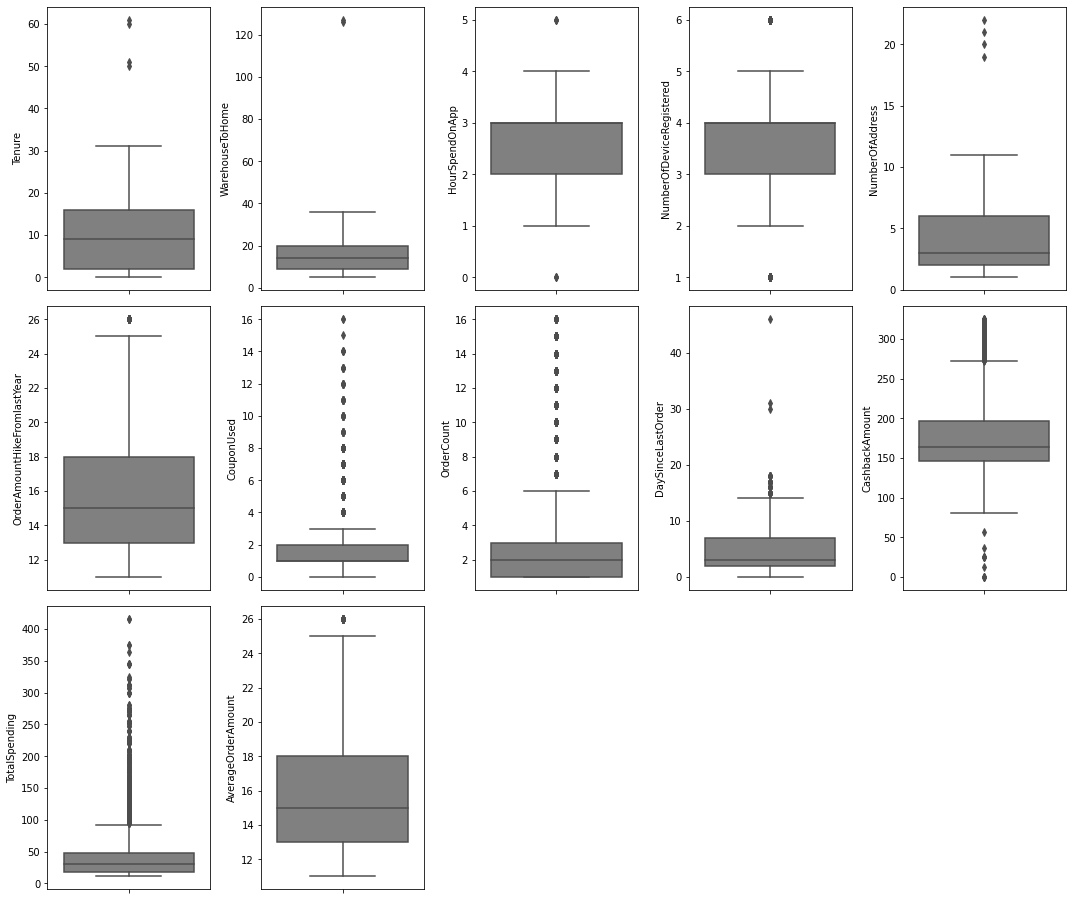

In [ ]:
plt.figure(figsize=(15, 50))
for i in range(0, len(nums)):
    plt.subplot(len(nums),5,i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='h')
    plt.tight_layout()

 
1.	Tenure : Terdapat indikasi outliers yaitu pada nilai sekitar 50 dan 60 serta nilai outliers berjarak melebihi 1.5x IQR dari Q3 .

2.	WarehouseToHome : Terdapat indikasi outliers, nilai mean dan median tidak terlalu jauh. Data outlier berada pada nilai 120 ke atas yang melebihi jarak 1.5x IQR dari Q3.
3.	HourSpendOnApp : Terdapat indikasi outliers yang berada di nilai 0 yang kurang dari jarak 1.5x IQR dari Q1 dan data nilai 5 yang melebihi jarak 1.5x IQR dari Q3. Nilai mean dan median tidak memiliki selisih terlalu jauh.
4.	NumberOfDeviceRegistered : Terdapat indikasi outliers yang berada di nilai 1 dan nilai 6. Nilai mean dan median tidak memiliki selisih tidak terlalu jauh.
5.	NumberOfAddress : Terdapat indikasi outliers yang berada di nilai 19 sampai dengan 22 yang melebihi jarak 1.5x IQR dari Q3. Nilai mean dan median yang tidak berbeda jauh sedangkan nilai min dan max berbeda jauh.
6.	OrderAmountHikeFromlastYear : Terdapat indikasi outliers yang berada di nilai 26 yang melebihi jarak 1.5x IQR dari Q3. Nilai mean dan median tidak terlalu jauh dan termasuk pada distribusi positive skewed.

7.	CouponUsed :Terdapat indikasi outliers yang nilainya melebihi jarak 1.5x IQR dari Q3. Nilai mean dan median tidak berbeda jauh. 

8.	OrderCount : Terdapat indikasi outliers yang  nilainya melebihi jarak 1.5x IQR dari Q3. Nilai mean dan median tidak berbeda terlalu jauh. Nilai min dan max data sangat jauh.

9.	DaySinceLastOrder : Terdapat indikasi outliers dengan data yang melebihi jarak 1.5x IQR dari Q3. Nilai mean dan median tidak terlalu jauh sedangkan nilai min dan max data jauh.
10.	CashbackAmount : Terdapat indikasi outliers. Nilai mean dan median pada CashBackAmount berbeda jauh dan perbedaan nilai min dan max memiliki selisih yang jauh. Outliers pada CashBackAmount memiliki nilai yang extreme.


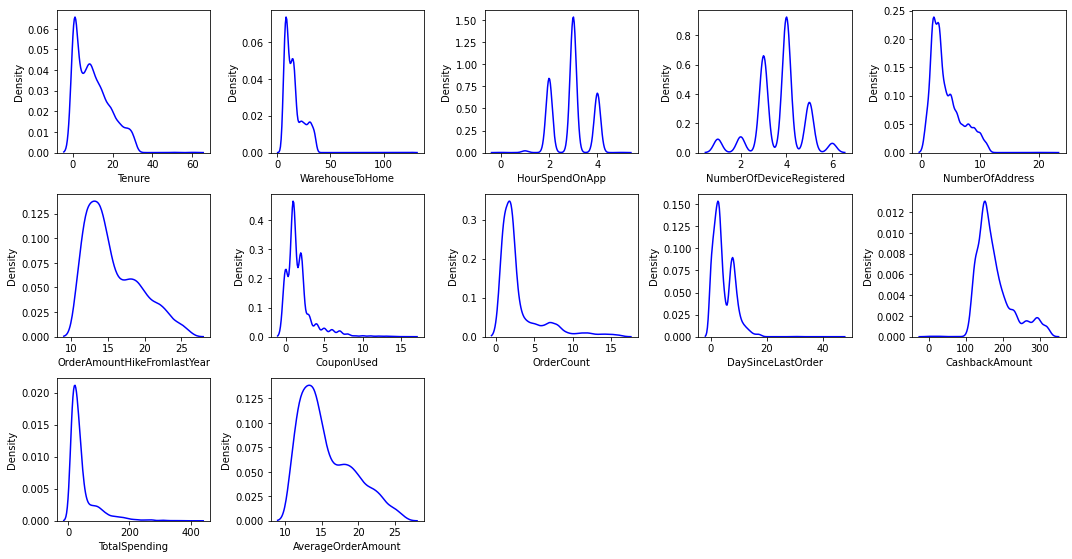

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1,)
    sns.kdeplot(x=df[nums[i]], color='blue')
    plt.xlabel(nums[i])
    plt.tight_layout()

Berdasarkan pengamatan, bentuk distribusi pada setiap kolom diantaranya:

1. Distribusi pada HourSpendOnApp dan NumberOfDeviceRegistered adalah multimodal
3. Distribusi pada data kolom Tenure, WarehouseToHome, OrderAmountHikeFromlastYear, , CouponUsed, OrderCount, DaySinceLastOrder dan CashbackAmount termasuk dalam distribusi positive skewed. Terdapat beberapa lonjakan kecil dalam kolom.

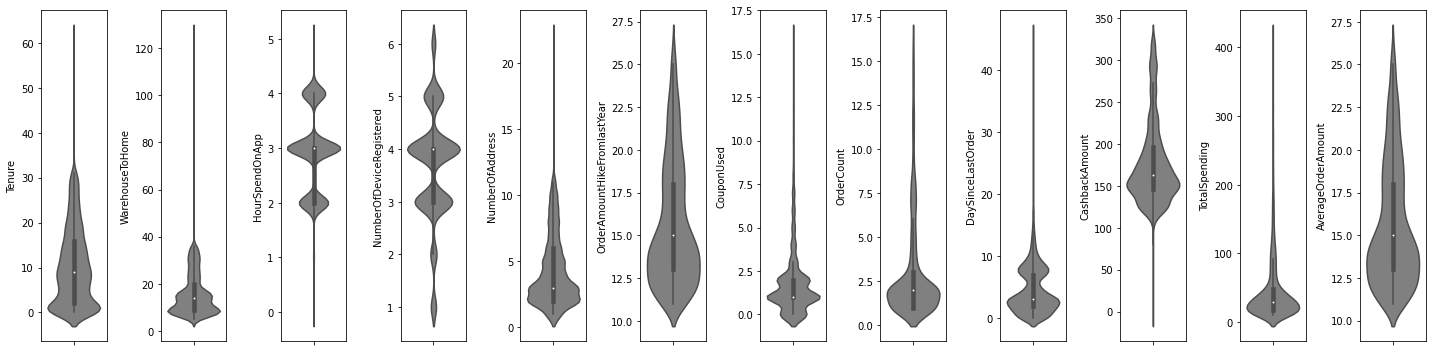

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()


1.	Tenure : Distribusi data terbanyak berada di sekitar nilai 2 hingga 16, nilai mode pada nilai 9 dan terdapat outliers.
2.	WarehouseToHome : Distribusi data terbanyak pada nilai 8 hingga 20. Terdapat nilai outliers yang dapat dikategorikan extreme.
3.	HourSpendOnApp : Distribusi data terbanyak pada nilai 2 hingga 3 dengan nilai mode 3 dan terdapat outliers.
4.	NumberOfDeviceRegistered : Distribusi data terbanyak pada nilai 3 hingga 4 dengan nilai mode adalah 4. 
5.	NumberOfAddress :  Distribusi data terbanyak pada nilai 2 hingga 6 dengan nilai mode adalah 3. 
6.	OrderAmountHikeFromlastYear :  Distribusi data terbanyak pada nilai 13 hingga 18 dengan nilai mode adalah 15. 
7.	CouponUsed : Distribusi data terbanyak pada nilai 1 hingga 2 dengan nilai mode adalah 1.

8.	OrderCount :  Distribusi data terbanyak pada nilai 1 hingga 3 dengan nilai mode adalah 2. 
9.	DaySinceLastOrder : Terdapat indikasi adanya outlier dan distribusi data terbanyak pada nilai 2 hingga 7 dengan nilai mode adalah 3. 

10.	CashbackAmount : Terdapat indikasi outliers yang extreme dan distribusi data terbanyak pada nilai 145 hingga 200 dengan nilai mode adalah 163,28.

### Fitur Kategorik

In [ ]:
#untuk mengetahui value counts setiap column dengan tipe categorical nominal
for col in cats:
    print(f'''Value count in column {col}:''')
    print(df[col].value_counts())
    print()

Value count in column CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Value count in column PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count in column SatisfactionScore:
3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64

Value count in column PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count in column Complain:
0    4026
1    1604
Name: Complain, dtype: int64

Value count in column Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count in column PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 

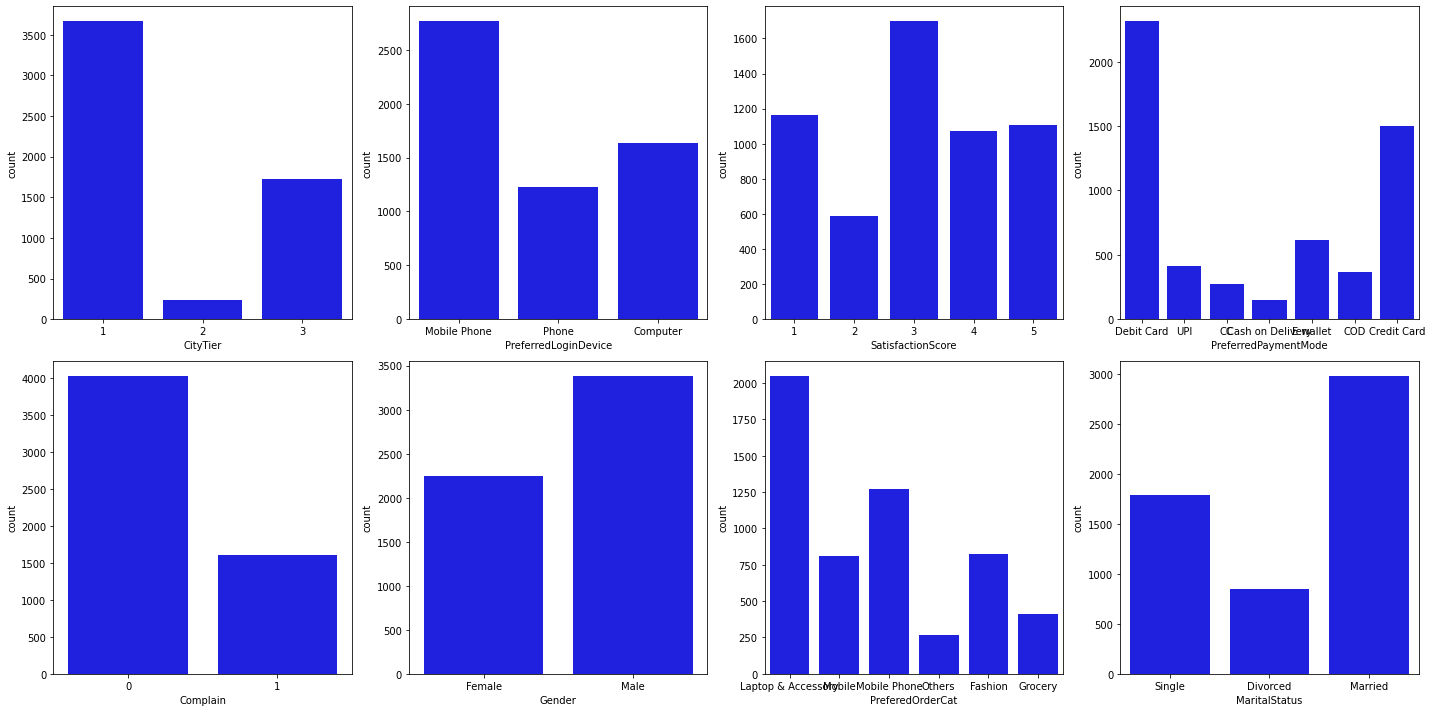

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
    plt.subplot(2, 4, i+1)
    sns.countplot(df[cats[0:][i]], color='blue', orient='h')
    plt.tight_layout()

Berdasarkan pengamatan :
1. Diketahui bahwa pada column PreferredLoginDevice, customer paling banyak menggunakan Mobile Phone.
2. Diketahui bahwa pada column PreferredPaymentMode, customer paling banyak menggunakan Debit Card sejumlah 2765 dan paling sedikit menggunakan Cash on Delivery sejumlah 149
3. Diketahui bahwa pada column Gender, customer didominasi oleh laki-laki.
4. Diketahui bahwa pada column PreferredOrderCat, customer paling banyak memesan Laptop & Accessory Mobile.
5. Diketahui bahwa pada column Marital Status, customer paling banyak berstatus Married/Menikah.

## Multivariat Analysis

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang 
diajarkan di kelas). <br> Tuliskan hasil observasinya, seperti:<br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana 
saja yang paling relevan dan harus dipertahankan?<br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu 
dilakukan terhadap feature itu?<br>
Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

### Fitur Numerik

#### Correlation Heatmap (Numeric)

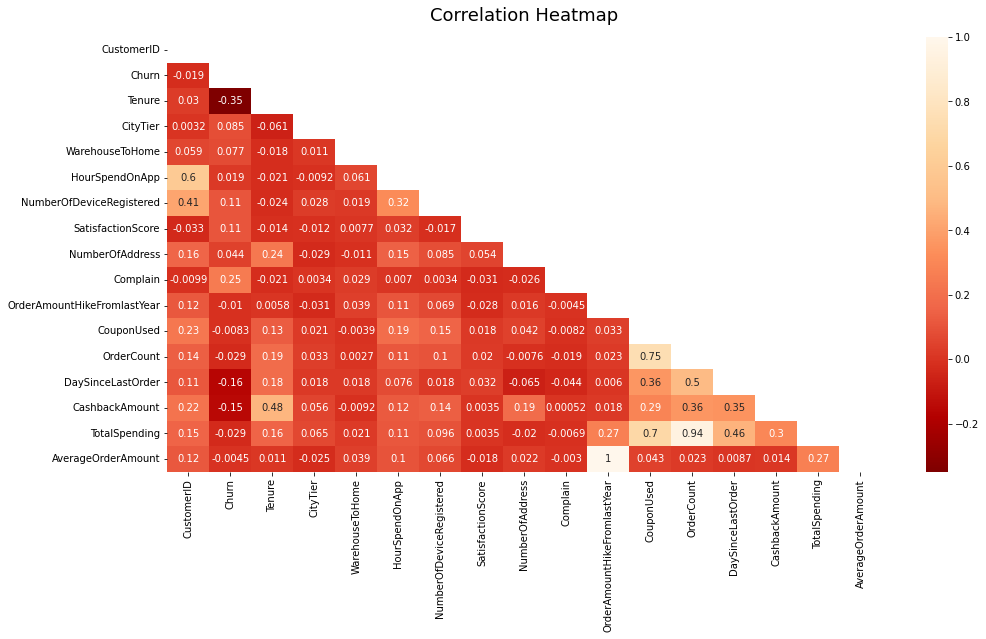

In [ ]:
# Correlation Analysis
plt.figure(figsize=(16, 8))

# Create mask for diagonal correlation plot
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# Plot the heatmap
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='OrRd_r' )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Dari Correlation Heatmap di atas terlihat bahwa:

1. Target (Churn) memiliki korelasi Positif dengan `CityTier`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `SatisfactionScore`, `Complain`
2. Target (Churn) memiliki korelasi Negatif dengan `Tenure`, `DaySinceLastOrder`, dan `CashbackAmount`.
3. Target (Churn) dengan `HourSpendOnApp`,`NumberOfAddress`, `OrderAmoundHikeFromlastYear`, `CouponUsed`, `OrderCount` memiliki korelasi yang sangat lemah ~0, hal ini menunjukkan bahwa fitur tersebut mungkin tidak memiliki potensi.
4. `OrderCount` memiliki korelasi yang kuat dengan `CouponUsed`. Bisa dikatakan redundan, namun `CouponUsed` memiliki korelasi yang lebih tinggi dengan target (Churn) dibandingkan dengan `OrderCount`.<br>
Tambahan:
5. Feature baru `TotalSpending` juga memilki korelasi yang tinggi dengan `OrderCount`. JIka dibandingkan degna target keduanya memiliki korelasi yang sama.
6. Untuk fitur baru `AverageOrderAmount` memiliki korelasi tinggi dengan `OrderAmuntHikeFromlastyear` dengan nilai 1. maka akan didrop salah satu.

### Fitur Kategorik

#### Kategorik - Target

Melihat hubungan fitur kategorik dengan fitur target melallui coountplot

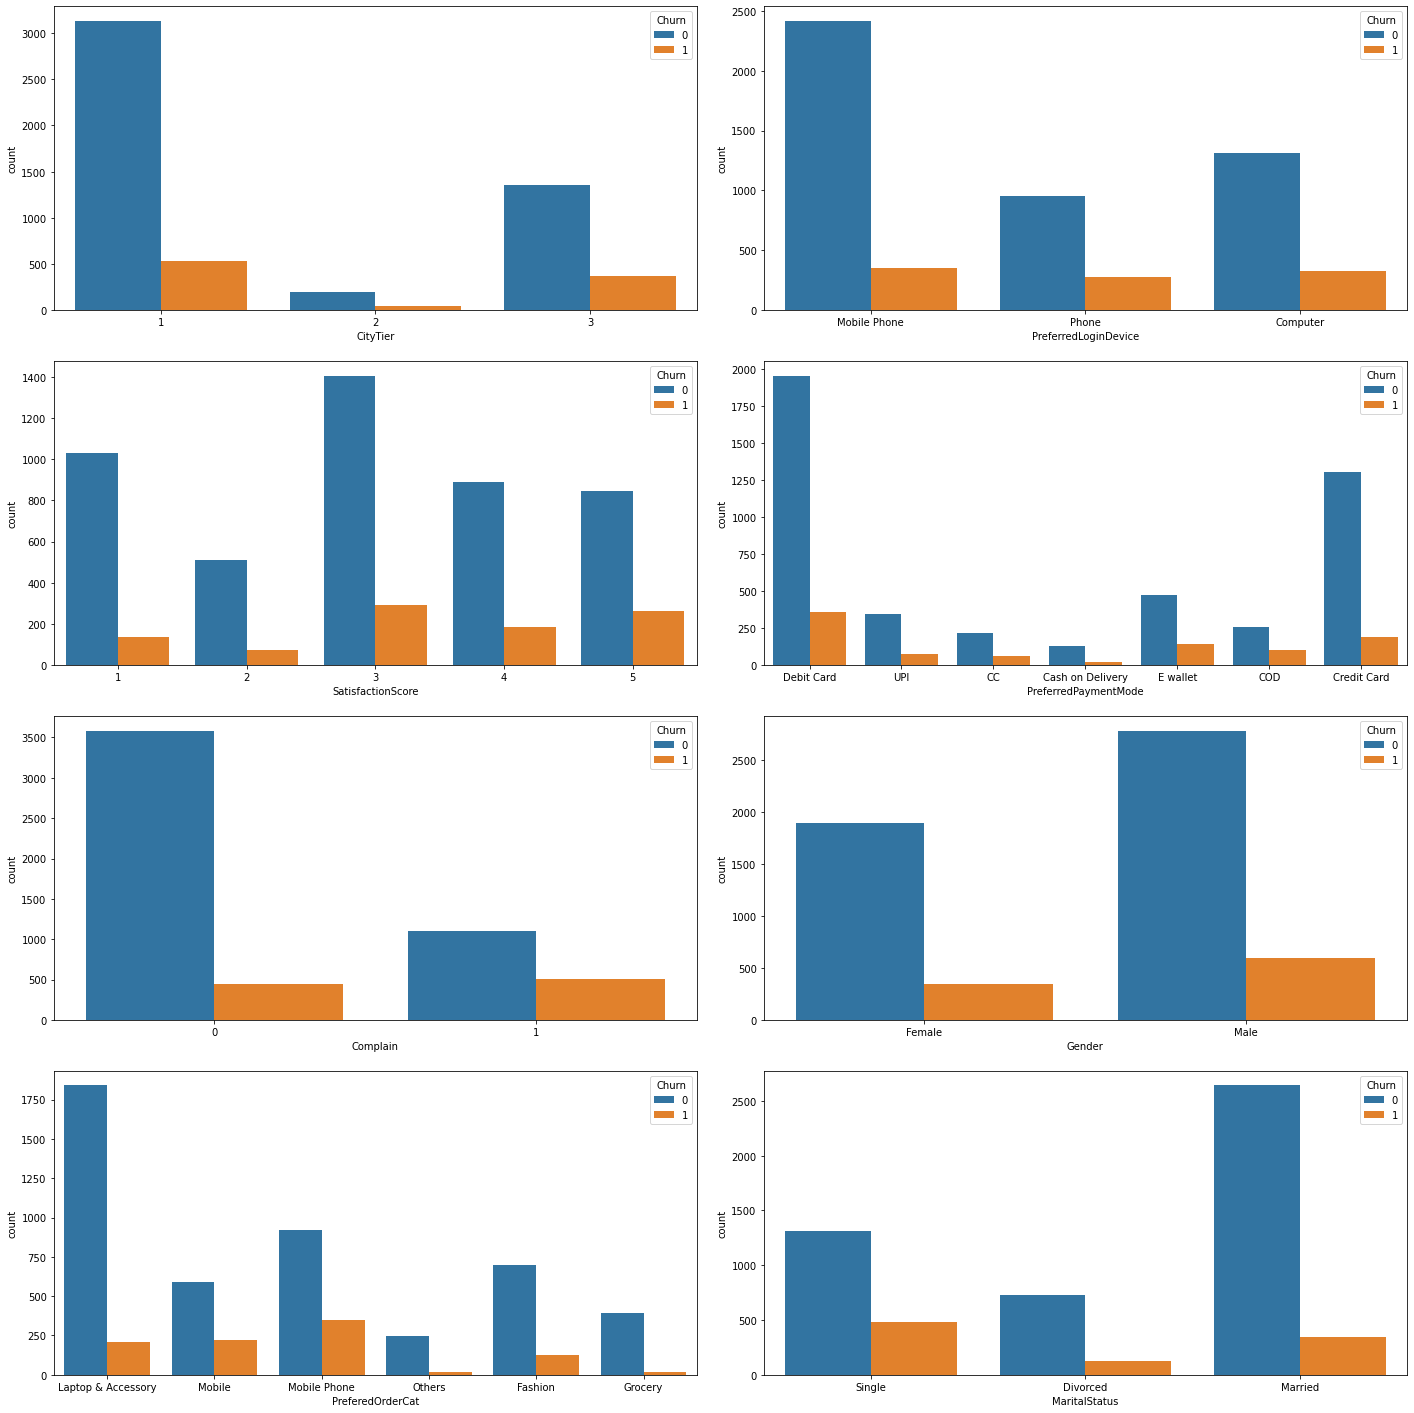

In [ ]:
# fitur kategorik - fitu Target 'Churn'
fig , ax = plt.subplots(4, 2, figsize = (20,20))     
for i , subplots in zip (df[cats], ax.flatten()):  
    sns.countplot(data=df, x = df[i], hue = 'Churn', ax = subplots)
plt.tight_layout(pad=2)
plt.show()

In [ ]:
#df[cats]

- Pada fitur `Gender`, *Male* lebih berpotensi churn dibandingkan *Female*. Namun untuk yang tidak churn pun *Male* lebih banyak daripada *Female*
- Pada fitur `MaritalStatus`, *Single* lebih banyak yang churn dibandingkan divorced dan *Married*. Namun secara umum *Married* lebih banyak dan dapat dilihat yang tidak churn untuk *Married* hampir dua kali lipat *Single*
- Pada fitur `PreferredPaymentMode`, pembayaran dengan *Debit Card* merupakan yang paling banyak churn maupun tidak churn
- Pada fitur `PreferedLoginDevice`, *Mobile Phone* berpotensi churn dibandingkan yang lainnya, namun tidak jauh berbeda dengan *Computer* dan *Phone*. Begitu juga dengan yang tidak churn paling banyak pengguna *Mobile Phone*, namun jumlahnya jauh lebih banyak dari pada dua kategori lainnya
- Pada fitur `PreferedCatOrder` categoory order *MobilePhone* lebih banyak churn dibandingkan kategori order lain. Secara umum *Laptop & Accessory* lebih banyak jumlahnya, yang tidak churn pada kategori ini lebih dari dua kali lipat *Mobile Phone* 
- Pada fitur 'SatisfactionScore`, Churn dan Tidak Churn paling tinggi pada score 3
- Pada fitur `CityTier`, tier 1 menjadi kategori yang paling banyak Churn dan tidak Churn
- Pada fitur `Complain`, pelanggan yang pernah melakukan komplain (value = 1) lebih banyak Churn dibandingakn dengan yang tidak melakukan komplain

Dari analisa diatas, ternyata churn tidak selalu sebanding dengan yang tidak churn dalam satu kategori fitur kategorik, jika pada satu kategori dalam fitur kategorik banyak yang churn belum tentu yang tidak churn juga banyak, bisa jadi jumlah yang tidak churn-nya lebih banyak di kategori lain

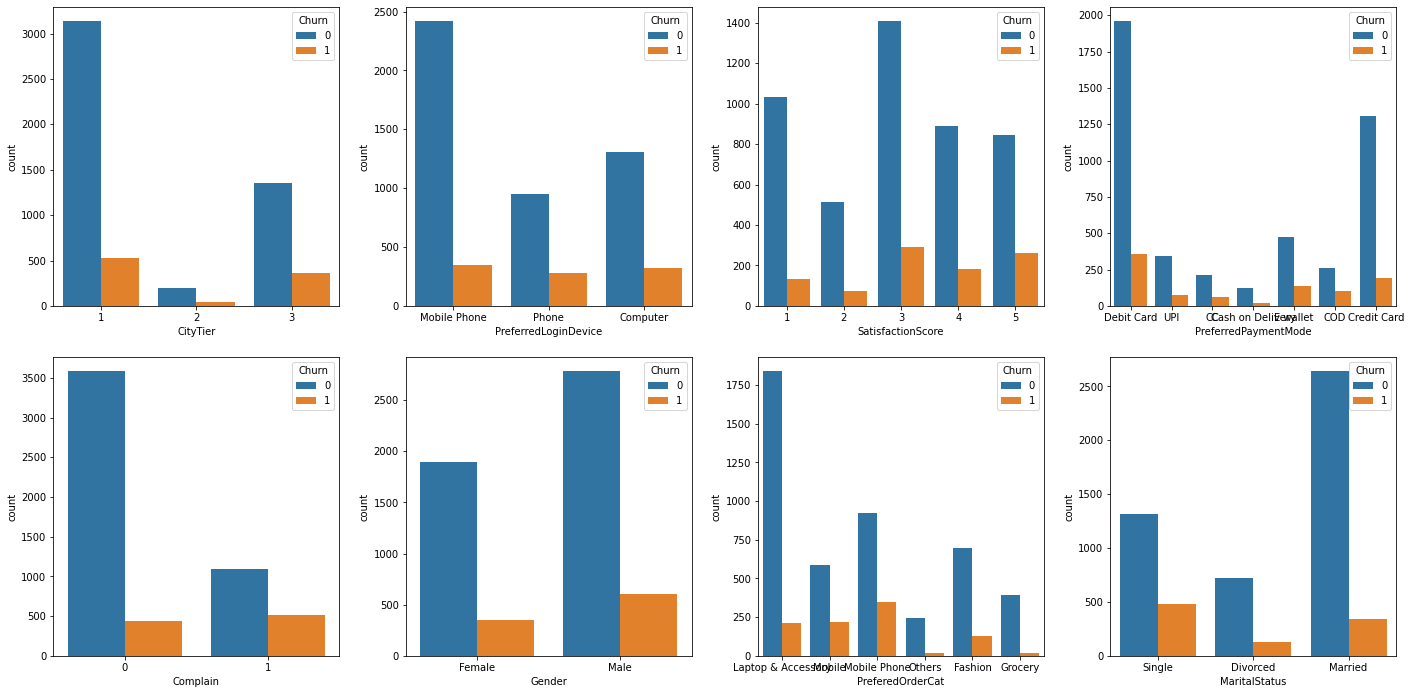

In [ ]:
# fitur kategorik - fitur Target 'Churn'
fig , ax = plt.subplots(2, 4, figsize = (20,10))     
for i , subplots in zip (df[cats], ax.flatten()):  
    sns.countplot(data=df, x = df[i], hue = 'Churn', ax = subplots)
plt.tight_layout(pad=2)
plt.show()

#### Kategorik - Numerik

Dibuat stripplot untuk melihat hubungan tiap fitur numerik dengan fitur kategorik

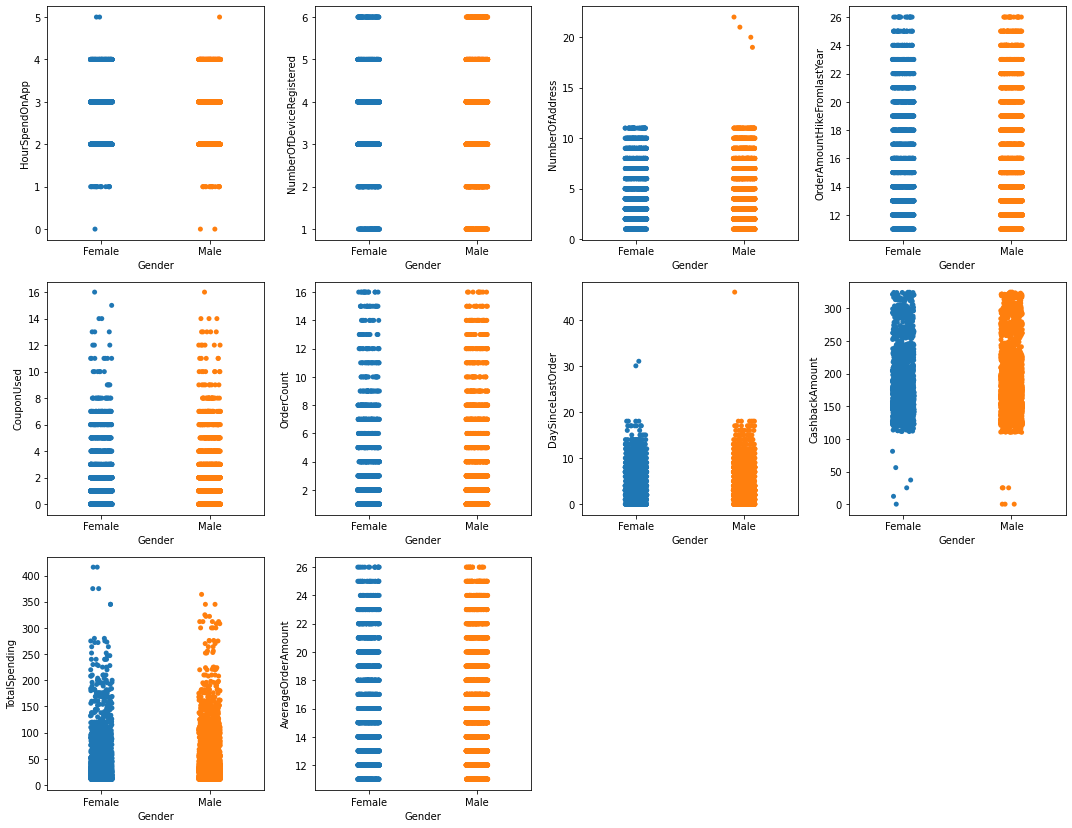

In [ ]:
# Gender - Numerik
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(df[nums].columns[2:])): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Gender', y=(df[nums].columns[2:])[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

Dari stripplot fitur `Gender` dengan numerik pada umumnya merata, tidak ada nilai pada fitur numeriknya yang terlalu timpang antar kategori dalam satu fitur kategorik

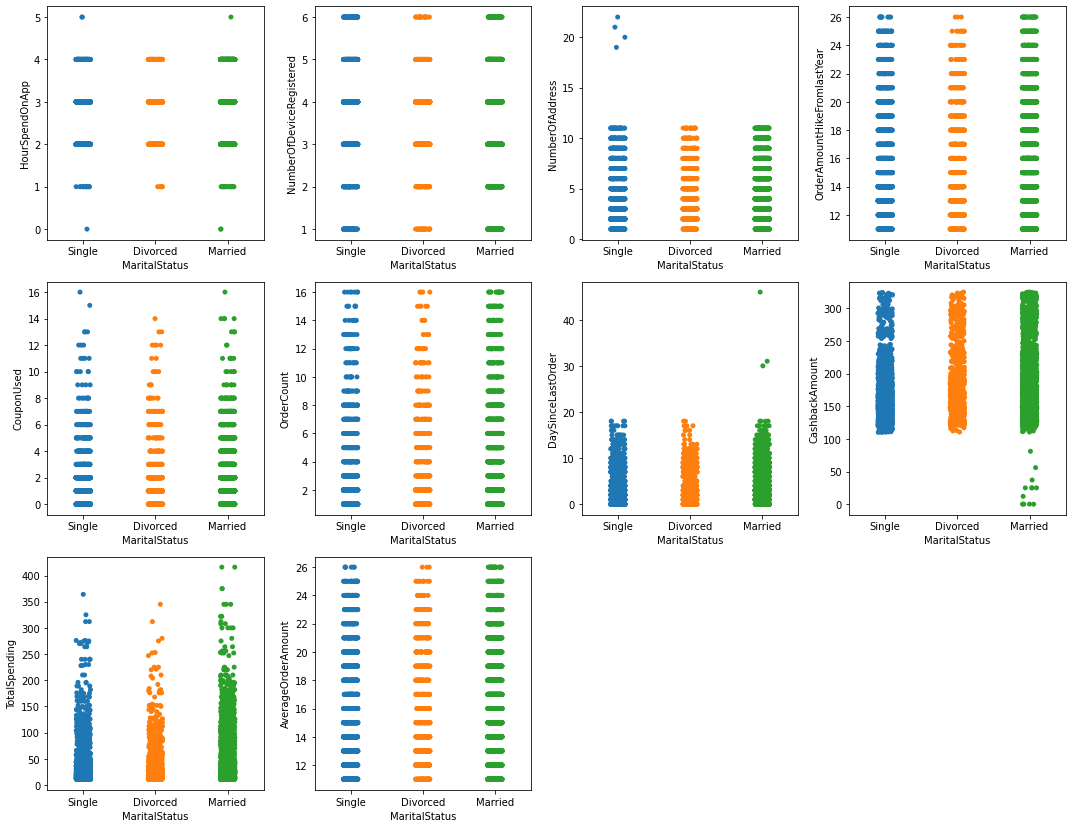

In [ ]:
# Maritalstatus - Numerik
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(df[nums].columns[2:])): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # set posisi stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='MaritalStatus', y=(df[nums].columns[2:])[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

Sama halnya dengan fitur `Gender`, dari stripplot fitur `MaritalStatus` dengan numerik pada umumnya merata, tidak ada yang terlalu timpang antar kategori dalam satu fitur kategorik

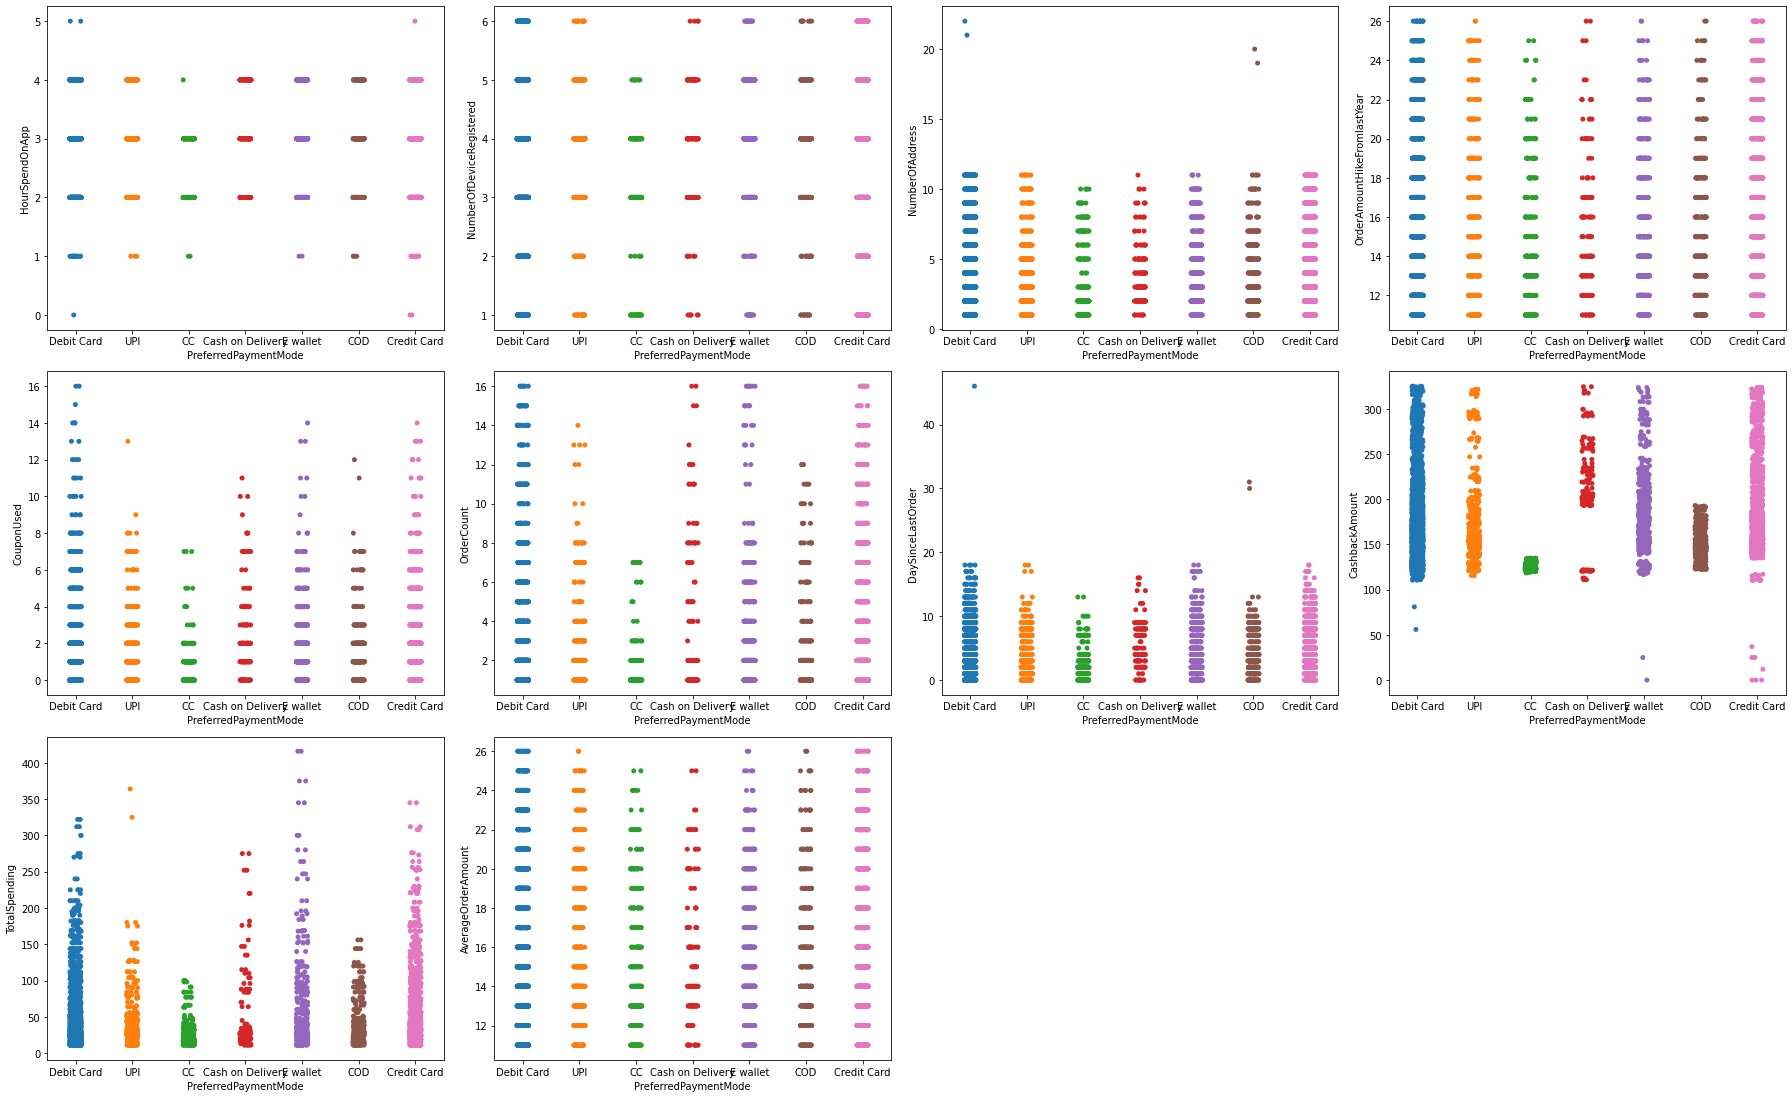

In [ ]:
# PreferredPaymentMode - Numerik
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(df[nums].columns[2:])): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='PreferredPaymentMode', y=(df[nums].columns[2:])[i]) # gambar  stripplotnya
    plt.tight_layout()

Dari stripplot fitur `PreferedPaymentMode`, *CC* terlihat banyak yang lebih kecil nilainya dan rentang nilainya lebih pendek pada beberapa fitur numerik, yaitu pada `CouponUsed`, `OrderCount`, dan `CashbackAmount`. 

In [ ]:
# df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'COD':'Cash on Delivery' , 'CC':'Credit Card'}) #pre-processing

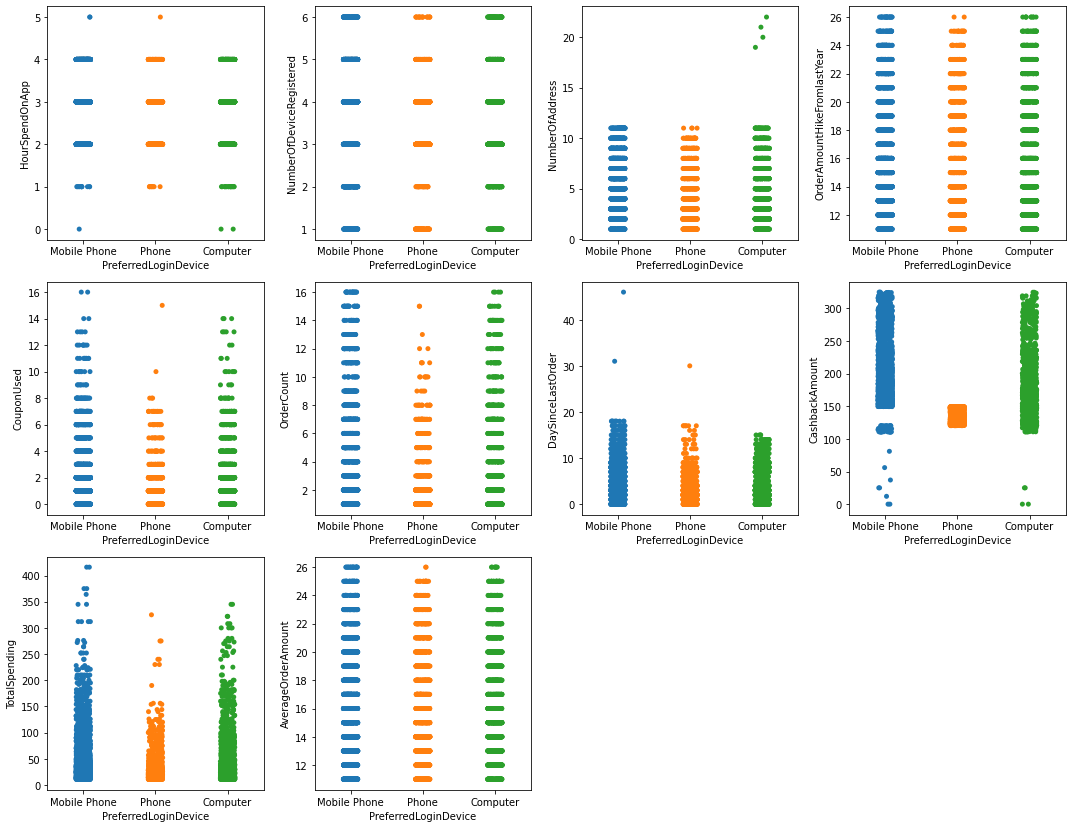

In [ ]:
# PreferredLoginDevice - Numerik
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(df[nums].columns[2:])): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='PreferredLoginDevice', y=(df[nums].columns[2:])[i]) # gambar stripplotnya
    plt.tight_layout()

Pada stripplot `PreferredLoginDevice` yang paling terlihat berbeda terdapat pada fitur numerik `CashbackAmount`, untuk *Phone* persebarannya paling sempit dan berpusat di tengah-tengah kategori lain

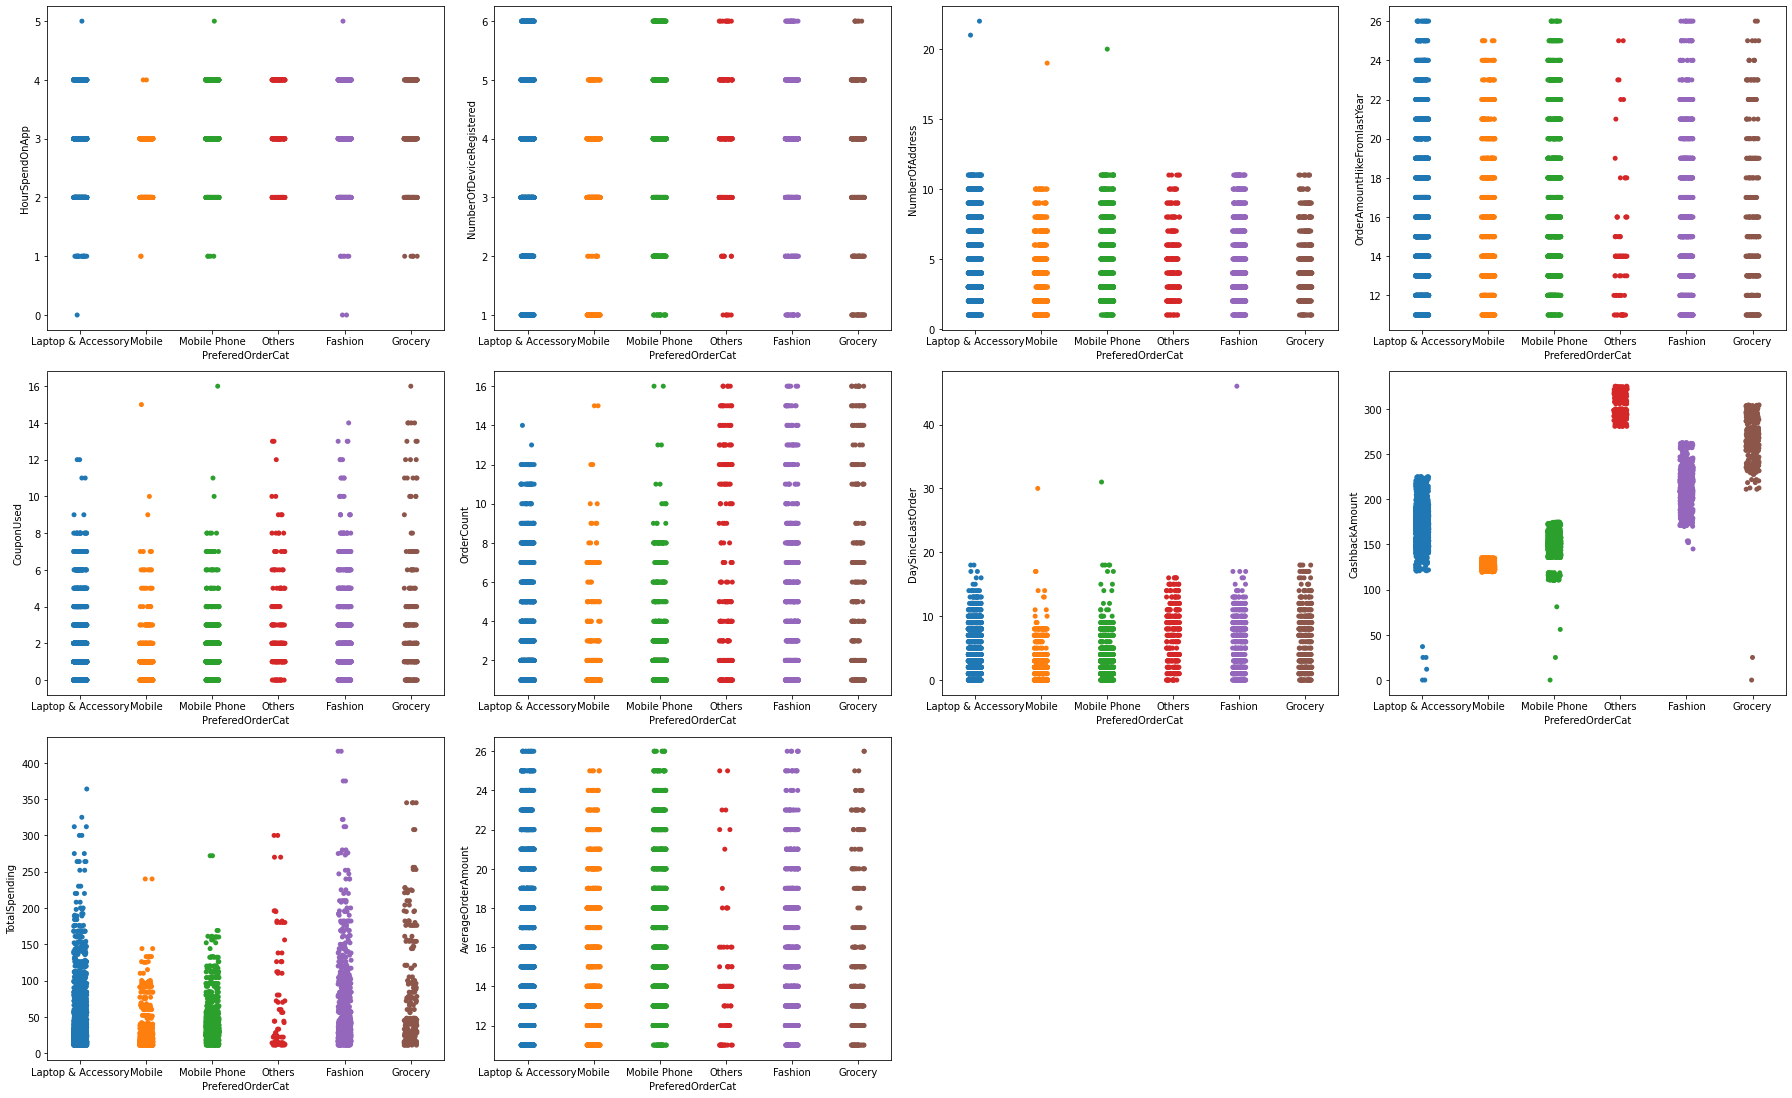

In [ ]:
# PreferedOrderCat - Numerik 
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(nums[2:])): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='PreferedOrderCat', y=(nums[2:])[i]) # gambar stripplotnya
    plt.tight_layout()

Pada `PreferedOrderCat` untuk `CashbackAmount` kategori *Others* terlihat paling tinggi, dimana sebarannya memusat di 300an

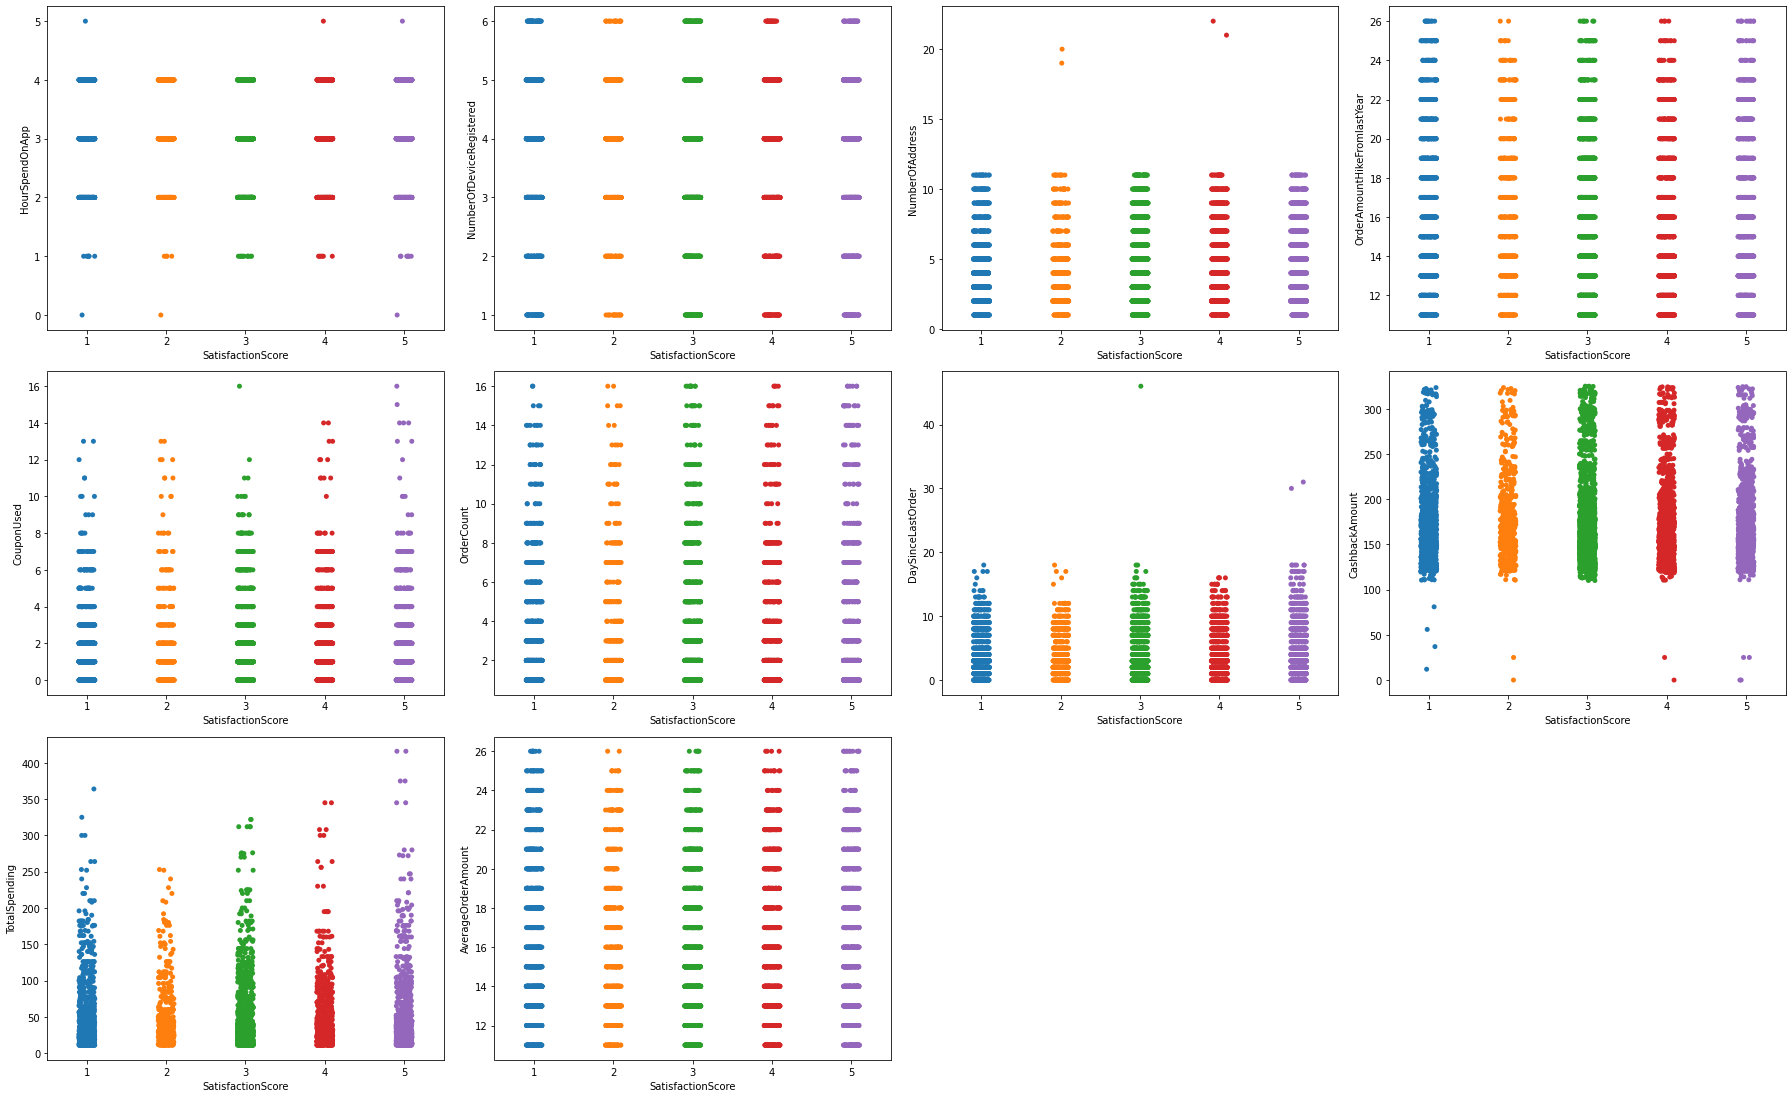

In [ ]:
# SatisfactionScore - Numerik 
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(nums[2:])): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='SatisfactionScore', y=(nums[2:])[i]) # gambar stripplotnya
    plt.tight_layout()

Dari stripplot fitur `SatisfactionScore` dengan numerik secara umum distribusinya merata, tidak ada yang terlalu timpang antar kategori dalam satu fitur kategoriknya

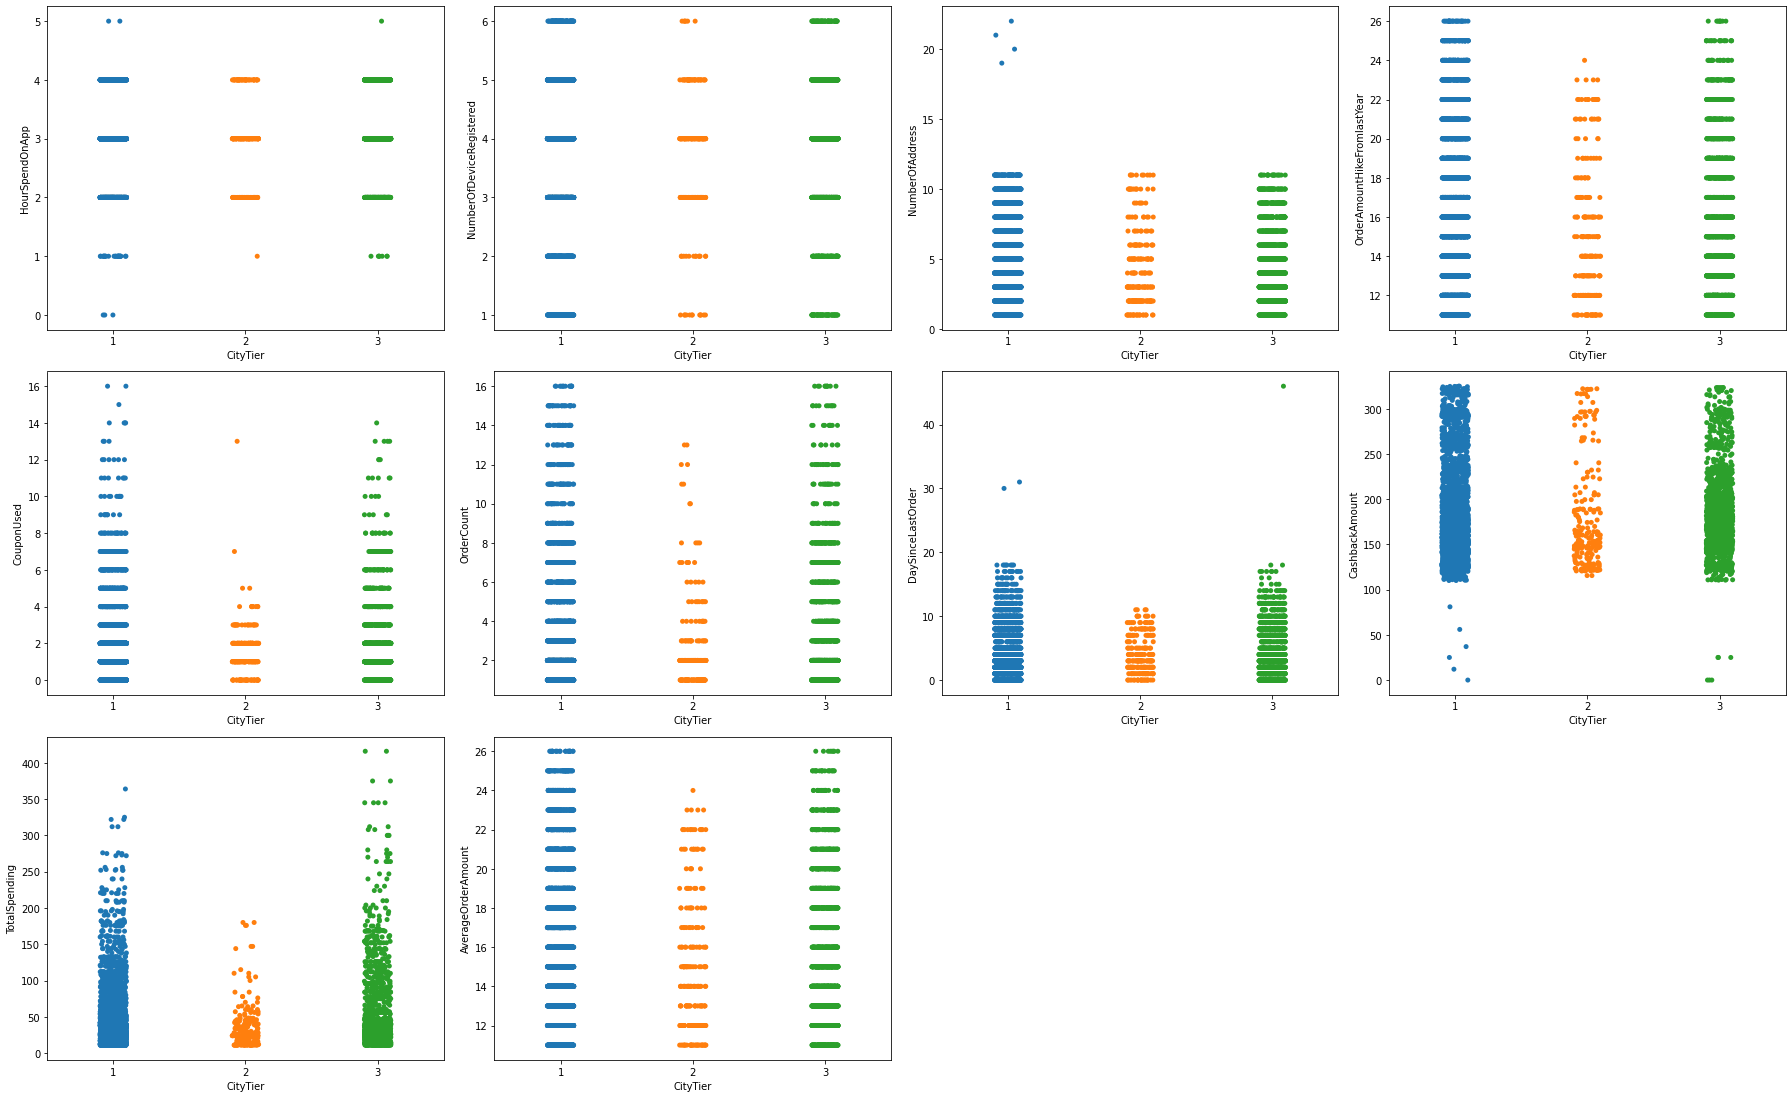

In [ ]:
# CityTier - Numerik 
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(nums[2:])): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='CityTier', y=(nums[2:])[i]) # gambar stripplotnya
    plt.tight_layout()


Dari stripplot fitur `CityTier` dengan `numerik` telihat lebih jarang pada tier 2 untuk bebrapa value fitur numerik seperti `CouponUsed`, `OrderCount`, dan ` CashbackAmount`

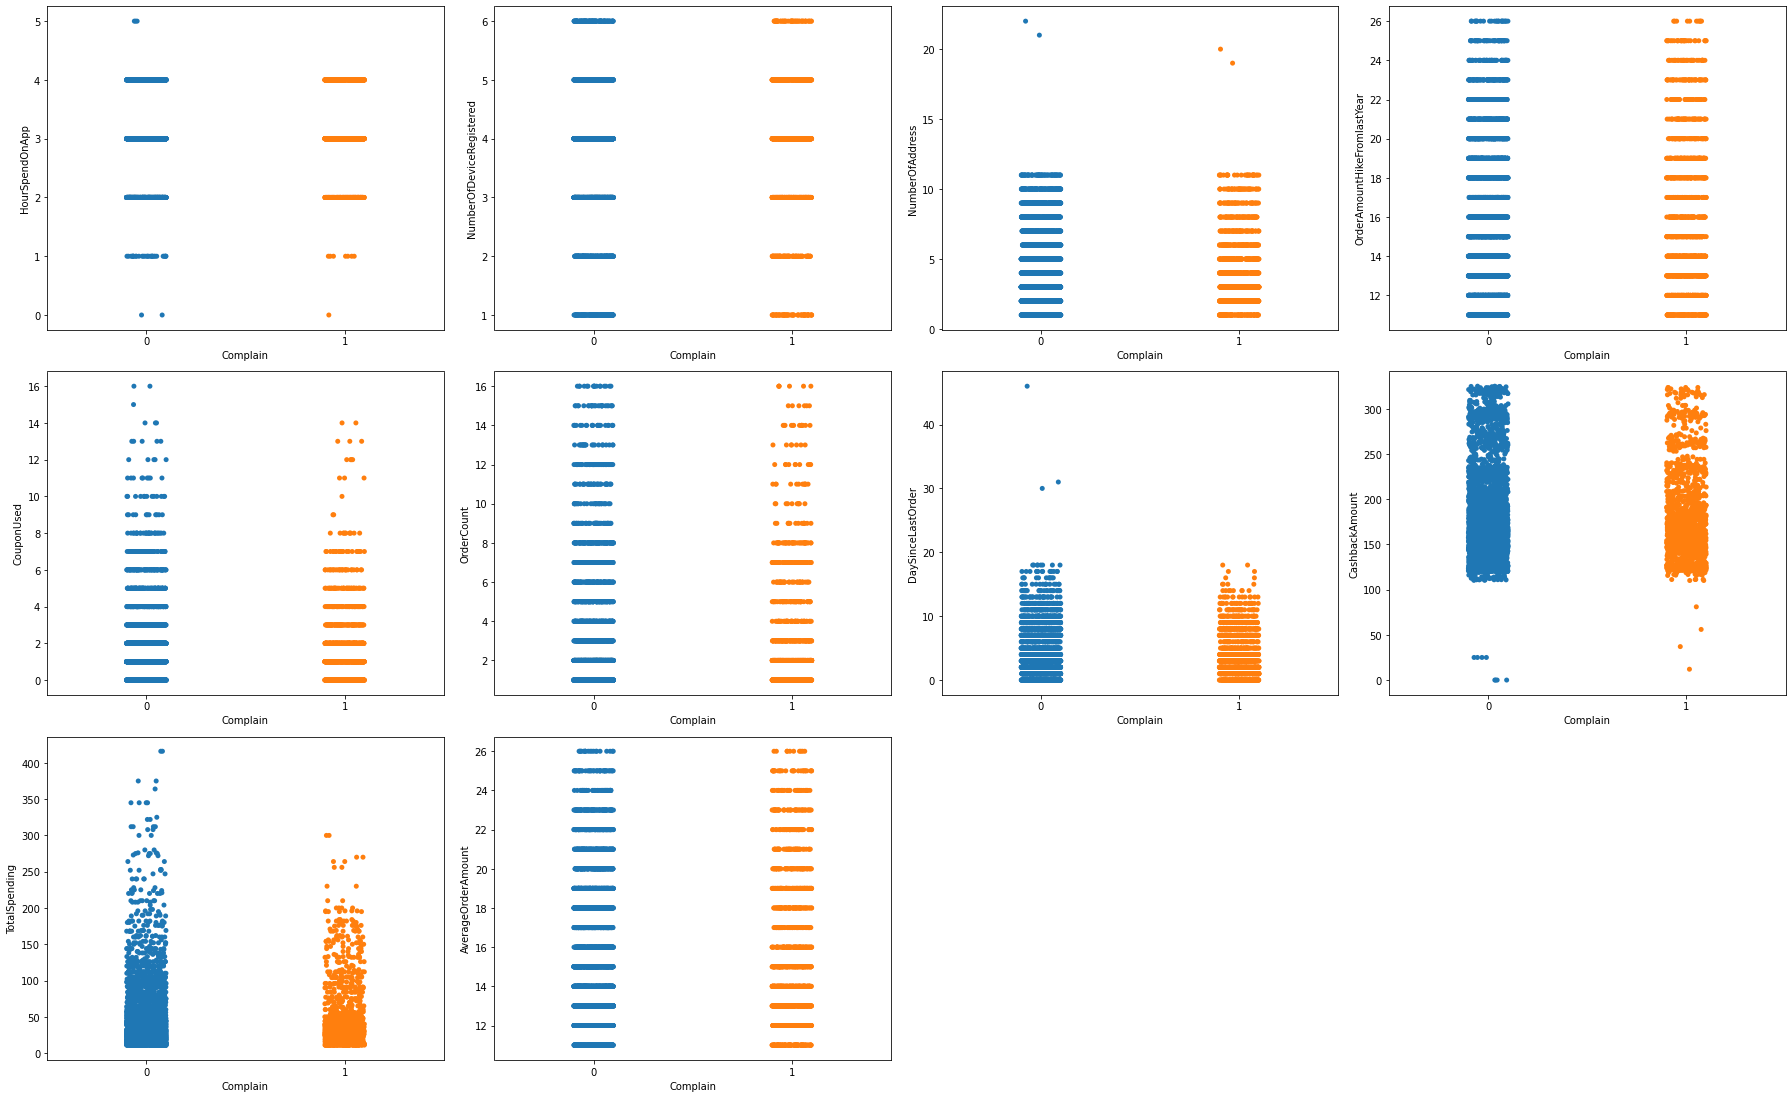

In [ ]:
# Complain - Numerik 
fig = plt.figure(figsize=(25, 20))
for i in range(0, len(nums[2:])): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Complain', y=(nums[2:])[i]) # gambar stripplotnya
    plt.tight_layout()

Dari stripplot fitur `Complain` dengan `numerik `secara umum tidak ada yang terlalu timpang antar kategori dalam satu fitur kategoriknya

Dari EDA diatas, ternyata ada beberapa unique value dalam fitur kategorik yang terindikasi sama namun beda penulisan, hal ini juga didukung oleh stripplot yang menunjukkan nilai antar unique_ value yang sama tersebut terlalu timpang. Jadi pada preprocessing nanti perlu dijadikan satu dengan cara direplace, fitur tersebut yaitu `PreferredPaymentMode` dengan unique_value:
1. 'CC' diindikasikan sama dengan 'Credit Card', jadi 'CC' akan direplace dengan 'Credit Card' atau sebaliknya.
2. 'COD' diindikasikan sama dengan 'Cash on Delivery', 'COD' akan direplace dengan 'Cach on Delivery' atau sebaliknya.


## Business Insight

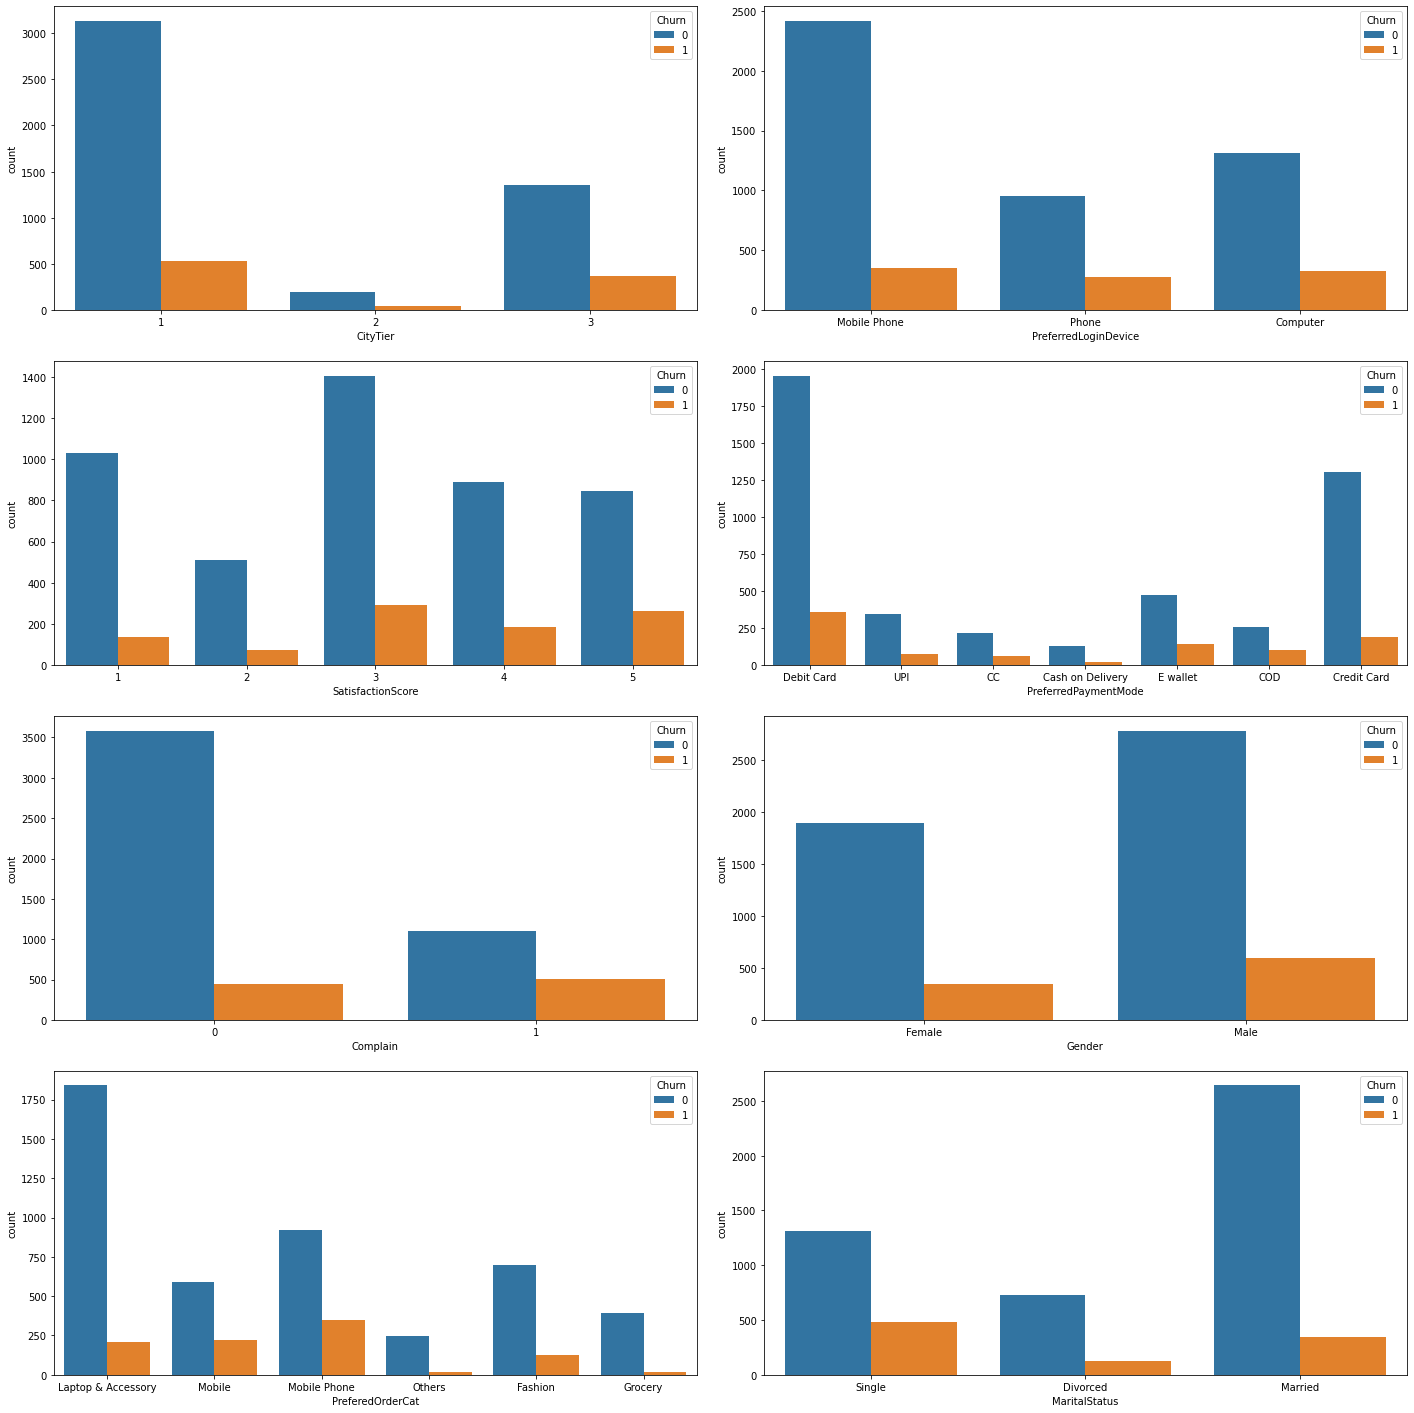

In [ ]:
# fitur kategorik - fitu Target 'Churn'
fig , ax = plt.subplots(4, 2, figsize = (20,20))     
for i , subplots in zip (df[cats], ax.flatten()):  
    sns.countplot(data=df, x = df[i], hue = 'Churn', ax = subplots)
plt.tight_layout(pad=2)
plt.show()

1.	Login via mobile phone memang merupakan metode yang paling disukai oleh pengguna, tetapi juga memiliki tingkat churn yang paling tinggi. Hal ini bisa menjadi indikasi bahwa proses login via mobile phone mungkin tidak mudah digunakan atau memiliki bug, yang menyebabkan pelanggan merasa kesulitan dan akhirnya memutuskan untuk berpindah ke platform lain. Untuk memperbaiki masalah ini, perusahaan bisa mengubah interface platform agar lebih user friendly dan juga mengatasi permasalahan bug. Kemudian memperluas usaha untuk mempromosikan proses login via mobile phone yang lebih mudah dan bebas bug (disesuaikan dengan masalah yang ada). Perusahaan bisa melakukan survei pelanggan untuk mengetahui lebih lanjut tentang masalah yang dialami dan mengimplementasikan solusi untuk memperbaiki proses login. Dalam hal ini, perusahaan dapat mempertimbangkan untuk mengeluarkan biaya untuk menjalankan iklan digital, seperti iklan di media sosial, atau menyewa agen pemasaran untuk mengelola proses ini.

2. Customer di dominasi oleh jenis kelamin pria, hal ini menunjukkan bahwa platform lebih dikenal oleh pria. Ini bisa menjadi peluang untuk meningkatkan penetrasi dan memperluas target pasar ke wanita. Perusahaan bisa mencoba menyediakan product yang menarik dan dibutuhkan oleh wanita dengan cara melakukan survey kemudian mengimplementasikannya melalui iklan digital.

Namun, dominasi jumlah customer pria diikuti juga dengan tingginya tingkat churn. Untuk mengatasi hal ini, perusahaan dapat melakukan survey terkait kebutuhan customer pria yang belum ada di platform ini, selain itu perusahaan juga dapat memberikan promo-promo atau diskon kepada barang-barang pria, sehingga diharapkan dapat menurunkan churn rate.

3.	Marital status yang paling banyak tercatat adalah married, tetapi marital status yang memiliki tingkat churn paling tinggi adalah single. Ini bisa menjadi indikasi bahwa customer dengan marital status single memiliki loyalitas yang kurang stabil dibandingkan dengan yang married. Ini merupakan peluang untuk memahami lebih lanjut tentang kebutuhan dan preferensi dari customer dengan marital status single dan bagaimana platform ini bisa memenuhi kebutuhan mereka lebih baik. Caranya bisa melalui pengambilan feedback atau survey. Dengan memahami apa yang dibutuhkan oleh pelanggan maka revenue akan meningkat dan perusahaan dapat mengalokasikan lebih banyak dana pada hal-hal lainnya yang dapat membuat pelanggan lebih nyaman dan betah

4.	Category order yang paling banyak dipesan adalah laptop dan aksesori, tetapi category order yang memiliki tingkat churn paling tinggi adalah mobile phone. Ini menunjukkan bahwa pelanggan mungkin kurang puas dengan produk mobile phone yang ditawarkan, mungkin toko online penjualnya bisa menjual lebih lengkap varian dan juga trusted. Ini bisa menjadi peluang untuk memperbaiki produk mobile phone dan memastikan bahwa pelanggan mendapatkan pengalaman yang lebih baik saat membeli produk ini.

5.	Tingkat churn yang tinggi juga terjadi pada pembayaran dengan kartu debit. Hal ini menunjukkan bahwa ada masalah yang harus diperbaiki. Ini bisa menjadi indikasi bahwa proses pembayaran dengan kartu debit mungkin sulit atau memakan waktu lama, yang menyebabkan pelanggan merasa frustrasi dan memutuskan untuk berpindah ke platform lain.

## Git

https://github.com/dzikrafatahillah/Ecommerce-Customer-Churn-Prediction

#STAGE-2

## Replace unique value

In [ ]:
df1 = df.copy() # Mencopy dataframe
df1.shape

(5630, 22)

Mengganti unique value yang redundan pada beberapa fitur<br.
Berdasarkan EDA sebelumnya pada `PreferredLoginDevice`: Phone =  Mobile Phone. Pada `PreferredPaymentMode` CC = Credit Card 
| COD = Cash on Delivery. Sehingga yang maknanya sama ini direplace dengan salah satunya

In [ ]:
# sebelum
a=1
for i in ['PreferredLoginDevice', 'PreferredPaymentMode']:
    print('unique_values sebelum replace')
    print('')
    print(a,'.', i)
    uv = df1[i].unique()
    n = df1[i].nunique()
    print ('unique_values:', uv)
    print ( 'banyak unique_values',n )
    print('')
    a+=1

unique_values sebelum replace

1 . PreferredLoginDevice
unique_values: ['Mobile Phone' 'Phone' 'Computer']
banyak unique_values 3

unique_values sebelum replace

2 . PreferredPaymentMode
unique_values: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
banyak unique_values 7



In [ ]:
#Mengganti Phone -> Mobile Phone untuk menghilangkan redundansi data
df1['PreferredLoginDevice'] = df1['PreferredLoginDevice'].replace({'Phone' : 'Mobile Phone'})

# Mengganti CC -> Credit Card & Cash on Delivery -> COD untuk menghilangkan redundansi data
df1['PreferredPaymentMode'] = df1['PreferredPaymentMode'].replace({'CC' : 'Credit Card', 'Cash on Delivery' : 'COD'})

# Mengganti CC -> Credit Card & Cash on Delivery -> COD untuk menghilangkan redundansi data
df1['PreferredPaymentMode'] = df1['PreferredPaymentMode'].replace({'CC' : 'Credit Card', 'Cash on Delivery' : 'COD'})

In [ ]:
# sesudah
a=1
for i in ['PreferredLoginDevice', 'PreferredPaymentMode']:
    print('unique_values sebelum replace')
    print('')
    print(a,'.', i)
    uv = df1[i].unique()
    n = df1[i].nunique()
    print ('unique_values:', uv)
    print ( 'banyak unique_values',n )
    print('')
    a+=1

unique_values sebelum replace

1 . PreferredLoginDevice
unique_values: ['Mobile Phone' 'Computer']
banyak unique_values 2

unique_values sebelum replace

2 . PreferredPaymentMode
unique_values: ['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']
banyak unique_values 5



## Business Insight #2

In [ ]:
# Create an array with the colors you want to use
colors = ["#39b6b5", "#c0c55f"]
# Set your custom color palette
custom_palette = sns.set_palette(sns.color_palette(colors))

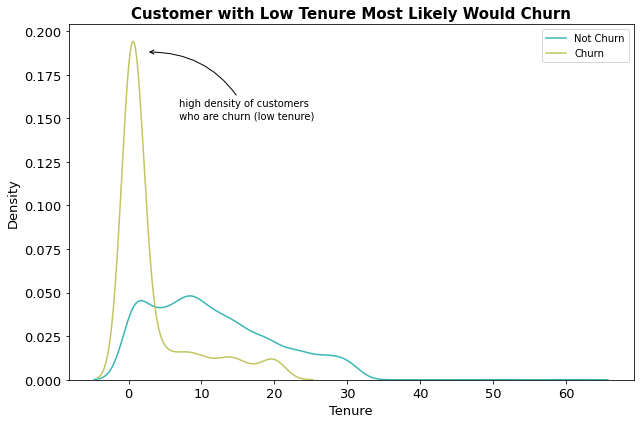

In [ ]:
# 1 Tenure
fig, ax = plt.subplots(figsize=(9, 6))

sns.kdeplot(df[df['Churn'] == 0]['Tenure'], color= '#39b6b5', label= 'Not Churn', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['Tenure'], color= '#c0c55f', label= 'Churn', ax=ax)

ax.set_title('Customer with Low Tenure Most Likely Would Churn',color='black',fontsize=15,fontweight='bold')
ax.set_ylabel('Density', fontsize=13) # y axis label
ax.set_xlabel('Tenure', fontsize=13) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

ax.annotate('high density of customers \n who are churn (low tenure)', 
             xy=(2.5, 0.188), xytext=(16,0.150), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
            ha='center')

plt.tight_layout()
plt.legend()
#plt.savefig('drive/My Drive/Colab Notebooks/fig/advanced_first.png')

In [ ]:
# 2 prefered login device

dfg1 = df1.groupby(['PreferredLoginDevice', 'Churn'])['CustomerID'].nunique().reset_index(name='UniqueCustomer')
dfg2 = df1.groupby(['PreferredLoginDevice'])['CustomerID'].nunique().reset_index(name='AllUniqueCustomer')

dfb = dfg1.merge(dfg2, how = 'inner', on='PreferredLoginDevice')
dfb['PercentUniqueCustomer'] = round(dfb['UniqueCustomer']*100.0/dfb['AllUniqueCustomer'], 2) 

dfb.replace({0:'Not Churn', 1:'Churn'}, inplace = True)
dfb

,PreferredLoginDevice,Churn,UniqueCustomer,AllUniqueCustomer,PercentUniqueCustomer
0,Computer,Not Churn,1310,1634,80.17
1,Computer,Churn,324,1634,19.83
2,Mobile Phone,Not Churn,3372,3996,84.38
3,Mobile Phone,Churn,624,3996,15.62


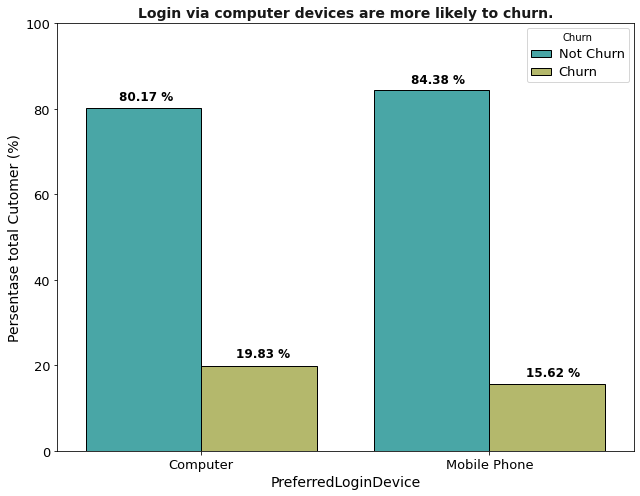

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))
x1 = dfb['PreferredLoginDevice']
y1 = dfb['PercentUniqueCustomer']

bs1 = sns.barplot(x=x1, y=y1, hue='Churn', data=dfb, palette=custom_palette, edgecolor ='black')

ax.set_title('Login via computer devices are more likely to churn.',color='black',fontsize=14, fontweight='bold', alpha = .9)
ax.set_ylabel('Persentase total Cutomer (%)', fontsize=14) # y axis label
ax.set_xlabel('PreferredLoginDevice', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

# x_numbers = range(len(x1))
# for i in x_numbers:
#     plt.text(x = (((x_numbers[i]-0.33)/2.05) - 0.177) , y = y1[i]+1.3, s = y1[i], size =11) # add data points
# text:
plt.text(x = .005-0.29, y = 82, s = '80.17 %', size =12, fontweight='bold')
plt.text(x = .1+.02, y = 21.8, s = '19.83 %', size =12, fontweight='bold')
plt.text(x = .727 , y = 86, s = '84.38 %', size =12, fontweight='bold')
plt.text(x = 1.125 , y = 17.5, s = '15.62 %', size =12, fontweight='bold')

ax.set_ylim(0,100)

plt.setp(bs1.get_legend().get_texts(), fontsize='13')
, fontsize='13')
plt.tight_layout()
plt.show()

In [ ]:

# 3 --------

In [ ]:
# 4 -------

In [ ]:
# 5 -------

## Feature Selection

1. Fitur yang kurang relevan dapat langsung diseleksi: CustomerID

In [ ]:
df2 = df1.drop('CustomerID', axis = 1)
df2.shape

(5630, 21)

2. Berdasarkan correlation heatmap pada EDA sebelumnya ada beberapa fitur memiliki korelasi yang tinggi lebih dari 0.7, dimana hal ini menunujukkan redundansi Fitur yang perlu dipertahankan yaitu fitur yang memiliki korelasi yang lebih tinggi dengan target `Churn`.<br>
Fitur yang akan didrop yaitu: `CouponUsed`,`TotalSpending`, dan `AverageAmountOrder`

In [ ]:
# drop `CouponUsed`, `TotalSpending, AverageOrderAmount `
df2 = df2.drop(['CouponUsed', 'TotalSpending', 'AverageOrderAmount'], axis =1)
df2.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder',
       'CashbackAmount'],
      dtype='object')

In [ ]:
# jumlah kolom numerik berubah setelah di drop
nums_new = nums.copy()
nums_new.remove('CouponUsed')
nums_new.remove('TotalSpending')
nums_new.remove('AverageOrderAmount')

# kategorik tetap
cats = cats

In [ ]:
dfc = df.copy() # copy untuk yang konvensioanal

## Train Test Split

In [ ]:
# Pisahkan feature dengan target/label
X = df2.drop('Churn', axis = 1)  # semua feature selain target
y = df2[['Churn']] # feature target

In [ ]:
# lakukan split dari data keseluruhan menjadi train size sebesar 80% dan test size sebesar 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state =42)

In [ ]:
# cek shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 17)
(1126, 17)
(4504, 1)
(1126, 1)


## A. Handling Missing Data

Berdasarkan tahap EDA sebelumnya terdapat 7 kolom yang memiliki nilai kosong, yaitu Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder,. Dilakukan imputasi median pada data-data yang memiliki nilai kosong. Dipilih imputasi median karena kolom-kolom yang kosong termasuk dalam data numerikal, selain itu median lebih robust terhadap outlier karena berdasarkan tahap sebelumnya, kolom-kolom tersebut berindikasi adanya outlier.

note: ordercount sudah didrop

In [ ]:
df2.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
# replace nana degnan median
df2['Tenure'].fillna(df2['Tenure'].median(), inplace=True)
df2['WarehouseToHome'].fillna(df2['WarehouseToHome'].median(), inplace=True)
df2['HourSpendOnApp'].fillna(df2['HourSpendOnApp'].median(), inplace=True)
df2['OrderAmountHikeFromlastYear'].fillna(df2['OrderAmountHikeFromlastYear'].median(), inplace=True)
# df2['CouponUsed'].fillna(df2['CouponUsed'].median(), inplace=True)
df2['OrderCount'].fillna(df2['OrderCount'].median(), inplace=True)
df2['DaySinceLastOrder'].fillna(df2['DaySinceLastOrder'].median(), inplace=True)

In [ ]:
df2.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
#XXXXXX XXXXXX
#df2 = df.fillna(df.median())
#df2.describe()

In [ ]:
df2.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,5.0,159.93
1,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,1.0,0.0,120.90
2,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,1.0,3.0,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,1.0,3.0,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,3.0,129.60


In [ ]:
# df ori untuk eval
dfx_eval = df2.drop('Churn', axis = 1)
dfy_eval = df2[['Churn']]

print(dfx_eval.shape)
print(dfy_eval.shape)

(5630, 17)
(5630, 1)


Handle missing value pada data setelah split

In [ ]:
X_train.isnull().sum()/len(X_train)*100

Tenure                         4.729130
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.573712
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.373890
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.618117
OrderCount                     4.706927
DaySinceLastOrder              5.484014
CashbackAmount                 0.000000
dtype: float64

In [ ]:
X_test.isnull().sum()/len(X_test)*100

Tenure                         4.529307
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                3.996448
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 5.150977
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    5.062167
OrderCount                     4.085258
DaySinceLastOrder              5.328597
CashbackAmount                 0.000000
dtype: float64

In [ ]:
# fitur-fitur yang yang terdapat missing value
feat_mv = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder']

In [ ]:
for i in feat_mv:
    imp = SimpleImputer(strategy = 'median')
    X_train[i] = imp.fit_transform(X_train[[i]]) # fit dan transform ke data train
    X_test[i] = imp.transform(X_test[[i]]) # transform saja mengitkuti yang dilakuakan pada train, tanpa fit ulang

In [ ]:
X_train.isnull().sum()/len(X_train)*100

Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

In [ ]:
X_test.isnull().sum()/len(X_test)*100

Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

Sudah tidak terdapat missing value

## B. Handling Duplicate Data

In [ ]:
#Melihat apakah data memiliki data duplikat atau tidak
df2.duplicated().sum()

1292

In [ ]:
# drop duplicate using drop_duplicates
df2 = df2.drop_duplicates()

In [ ]:
df2.duplicated().sum()

0

In [ ]:
# # dapatkan index duplicated
# dup_idx= df2[df2.duplicated()].index

# # drop by index
# df2_nd = df2.drop(dup_idx, axis = 0)

# # cek duplikat setalh drop
# df2_nd.duplicated().sum()
# shape setelah handle duplicated
# df2_nd.shape

In [ ]:
df2.shape

(4338, 18)

Handle Duplicate pada data setelah split

In [ ]:
X_train.duplicated().sum()

819

In [ ]:
X_test.duplicated().sum()

45

In [ ]:
# dapatkan index duplicated
X_train_dup = X_train[X_train.duplicated()].index # index duplicate pada x_train
X_test_dup = X_test[X_test.duplicated()].index # index duplicate pada x_test

# drop by index
X_train = X_train.drop(X_train_dup, axis = 0)
X_test = X_test.drop(X_test_dup, axis = 0)

#drop juga pada y tapi mengikuti X agar tetap sesuai
y_train = y_train.drop(X_train_dup, axis = 0)
y_test = y_test.drop(X_test_dup, axis = 0)

# cek duplikat setalh drop
print(X_train.duplicated().sum())
print(X_test.duplicated().sum())

0
0


In [ ]:
# cek shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3685, 17)
(1081, 17)
(3685, 1)
(1081, 1)


kolom dan baris data telah sesuai

## C. HANDLE OUTLIERS


Handle outlier dilakukan untuk fitur WarehouseToHome dan CashbackAmount

In [ ]:
feat_otl = ['WarehouseToHome', 'CashbackAmount']

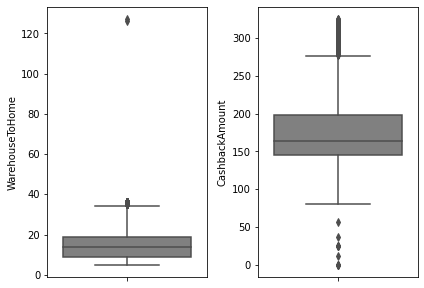

In [ ]:
# cek boxplot sebelum
plt.figure(figsize=(6, 8))
for i in range(0, len(feat_otl)):
    plt.subplot(len(feat_otl),2,i+1)
    sns.boxplot(y=df2[feat_otl[i]], color='gray', orient='h')
    plt.tight_layout()

In [ ]:
#f3=df2.copy()

In [ ]:
print(f'Jumlah baris pada dataset sebelum memfilter outlier: {len(df2)}')

filtered_entries = np.array([True] * len(df2))
for col in ['WarehouseToHome','CashbackAmount']:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df2[col] >= low_limit) & (df2[col] <= high_limit)) & filtered_entries
    
df2 = df2[filtered_entries]

print(f'Jumlah baris pada dataset setelah memfilter outlier: {len(df2)}')

Jumlah baris pada dataset sebelum memfilter outlier: 4338
Jumlah baris pada dataset setelah memfilter outlier: 3902


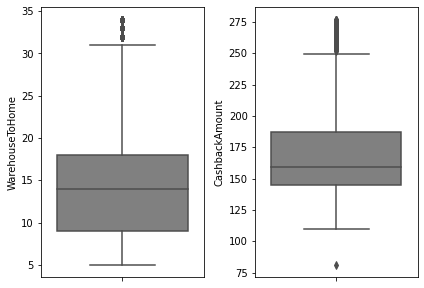

In [ ]:
# cek boxplot sesudah
plt.figure(figsize=(6, 8))
for i in range(0, len(feat_otl)):
    plt.subplot(len(feat_otl),2,i+1)
    sns.boxplot(y=df2[feat_otl[i]], color='gray', orient='h')
    plt.tight_layout()

* Selisih mean dan median setelah melalui proses penghapusan outliers berkurang dibandingkan sebelum outliers dihapus.
* Penghapusan outlier dilakukan pada data numerical yang memiliki global outliers.

Handle outlier pada data setelah split, hanya dilakukan pada data train, pada test tidak untuk menjaga data test tetap sesuai kenyataannya

In [ ]:
# Handle Outlier pada X_train

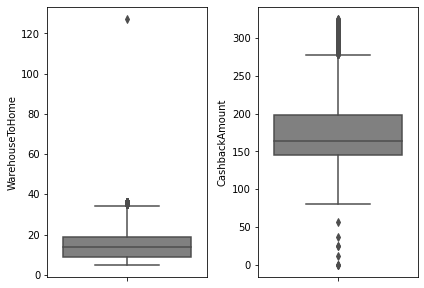

In [ ]:
# cek boxplot sebelum
plt.figure(figsize=(6, 8))
for i in range(0, len(feat_otl)):
    plt.subplot(len(feat_otl),2,i+1)
    sns.boxplot(y=X_train[feat_otl[i]], color='gray', orient='h')
    plt.tight_layout()

In [ ]:
# handle outlier berdasarkan indetifikasi indeks
def index_outlier(train):
    out_ind_list = []
    for col in ['WarehouseToHome','CashbackAmount']:
        Q1 = train[col].quantile(0.25)
        Q3 = train[col].quantile(0.75)
        IQR = Q3 - Q1 
        low_limit = Q1 - (IQR * 1.5)
        high_limit = Q3 + (IQR * 1.5)
        
        out_ind_col = list(train[(train[col] > high_limit) | (train[col] < low_limit)].index)
        out_ind_list.append(out_ind_col)
    return out_ind_list

In [ ]:
# dapatkan index dari semua outlier dari function index_outlier
index_outlier = index_outlier(X_train)

# jadikan dalam satu list
index_outlier_list = []
for i in index_outlier:
    index_outlier_list.extend(i)

# list baru berupa indeks outlier tanpa ada yang duplikat
index_to_drop = []
for i in index_outlier_list:
    if i not in index_to_drop:
        index_to_drop.append(i)

In [ ]:
len(index_to_drop) # banyak index/baris yang siap didrop

364

In [ ]:
# drop row based on index that contain outliers
X_train = X_train.drop(index_to_drop, axis = 0)
X_train.shape

(3321, 17)

In [ ]:
# drop indeks yang sama di y_train mengikuti X_train agar panjang data tetap sama dan sesuai
y_train = y_train.drop(index_to_drop, axis = 0)
y_train.shape

(3321, 1)

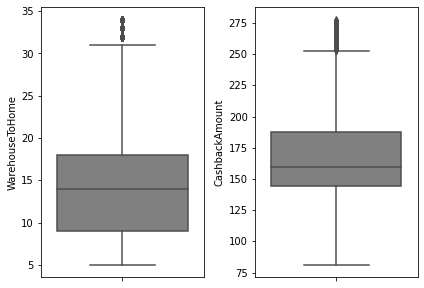

In [ ]:
# cek boxplot sesudah
plt.figure(figsize=(6, 8))
for i in range(0, len(feat_otl)):
    plt.subplot(len(feat_otl),2,i+1)
    sns.boxplot(y=X_train[feat_otl[i]], color='gray', orient='h')
    plt.tight_layout()

In [ ]:
# X_test untuk yang konvensional
X_test_c = X_test.copy()

## D.Feature Transformation

In [ ]:
#klasifikasi apakah feature tersebut memiliki distribusi normal atau tidak berdasarkan nilai skew dan kurtosis
feature_trans = nums_new
feature_normal = []
feature_non_normal = []

for i in feature_trans:
  skw = skew(df2[i])
  kts = kurtosis(df2[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_non_normal.append(i)
  else:
    feature_non_normal.append(i)

print('Distribusi Normal:', feature_normal)
print('Distribusi Non Normal:', feature_non_normal)

Distribusi Normal: ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CashbackAmount']
Distribusi Non Normal: ['OrderCount', 'DaySinceLastOrder']


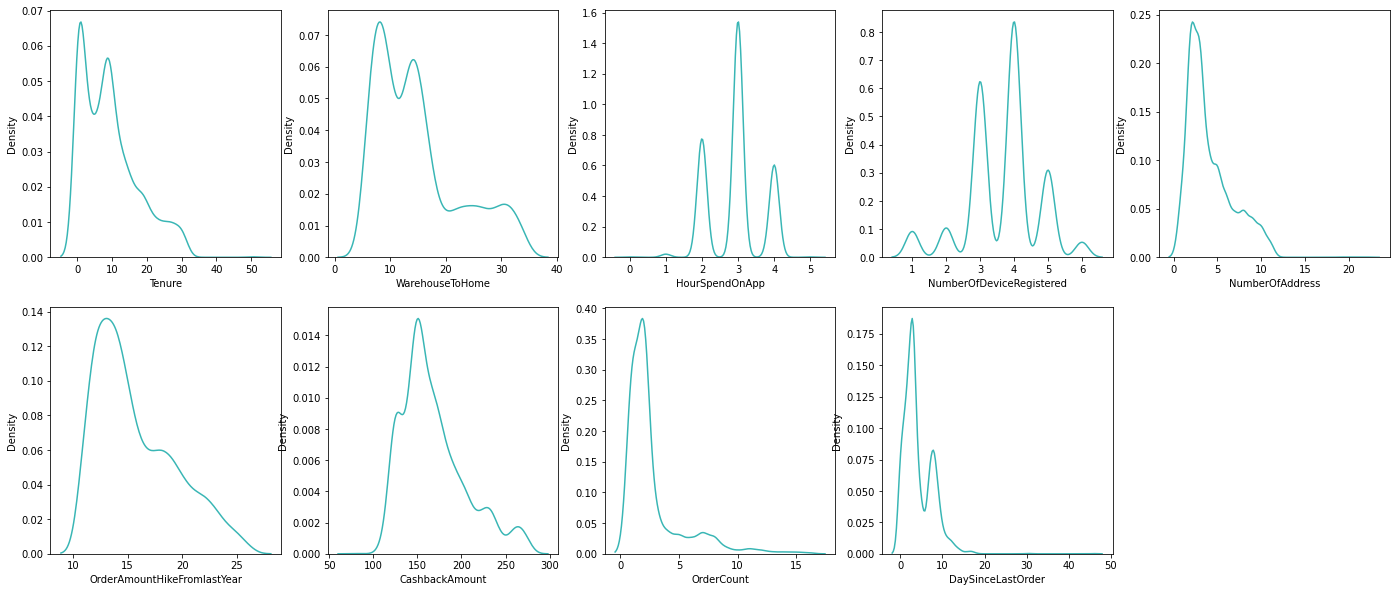

In [ ]:
# sebelum transformasi
transform = feature_normal + feature_non_normal
fig = plt.figure(figsize =(24,10) )

for j in range(len(transform)):
  var = transform[j]
  #df2[var] = np.log10(df2[var]+1)

  sub = fig.add_subplot(2, 5, j + 1)
  sub.set_xlabel(var)
  #df2[var].plot(kind = 'hist')
  sns.kdeplot(data= df2[var])

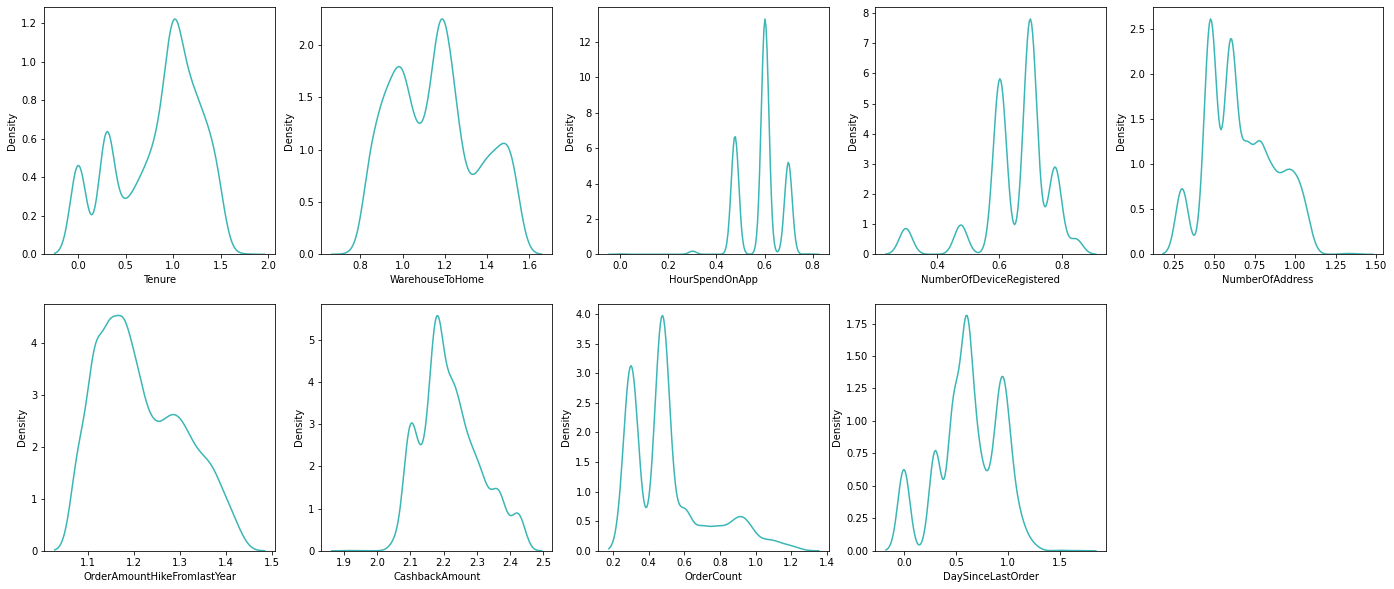

In [ ]:
#lakukan log transformation untuk membuat fitur menjadi lebih terdistribusi secara normal.
transform = feature_normal + feature_non_normal
fig = plt.figure(figsize =(24,10) )

for j in range(len(transform)):
  var = transform[j]
  df2[var] = np.log10(df2[var]+1)

  sub = fig.add_subplot(2, 5, j + 1)
  sub.set_xlabel(var)
  #df2[var].plot(kind = 'hist')
  sns.kdeplot(data= df2[var])

In [ ]:
#Melakukan Feature Scaling menggunakan StandarScaler 
from sklearn.preprocessing import StandardScaler

In [ ]:
for i in nums_new:
    scaler = StandardScaler().fit(df2[[i]])
    df2[i] = scaler.transform(df2[[i]])

In [ ]:
df2.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,-0.336596,Mobile Phone,3,-1.561057,Debit Card,Female,0.188440,-0.482943,Laptop & Accessory,2,Single,1.656376,1,-1.480784,-0.962226,0.517245,-0.146372
1,1,0.357432,Mobile Phone,1,-1.010838,UPI,Male,0.188440,0.392334,Mobile,3,Single,1.183330,1,-0.107385,-0.962226,-2.071429,-1.511001
2,1,0.357432,Mobile Phone,1,1.696885,Debit Card,Male,-1.335387,0.392334,Mobile,3,Single,0.900254,1,-0.415493,-0.962226,-0.068558,-1.536052
3,1,-1.948079,Mobile Phone,3,0.248843,Debit Card,Male,-1.335387,0.392334,Laptop & Accessory,5,Single,1.433020,0,1.828313,-0.962226,-0.068558,-1.006984
4,1,-1.948079,Mobile Phone,1,-0.205755,Credit Card,Male,0.188440,-0.482943,Mobile,5,Single,-0.286085,0,-1.480784,-0.962226,-0.068558,-1.172320


Transformasi dan scaling pada data train dan test

In [ ]:
#klasifikasi apakah feature tersebut memiliki distribusi normal atau tidak berdasarkan nilai skew dan kurtosis
#feature_trans = nums.copy()
#del feature_trans[:2]
feature_normal = []
feature_non_normal = []

for i in nums_new:
  skw = skew(X_train[i])
  kts = kurtosis(X_train[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_non_normal.append(i)
  else:
    feature_non_normal.append(i)

print('Distribusi Normal:', feature_normal)
print('Distribusi Non Normal:', feature_non_normal)

Distribusi Normal: ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CashbackAmount']
Distribusi Non Normal: ['OrderCount', 'DaySinceLastOrder']


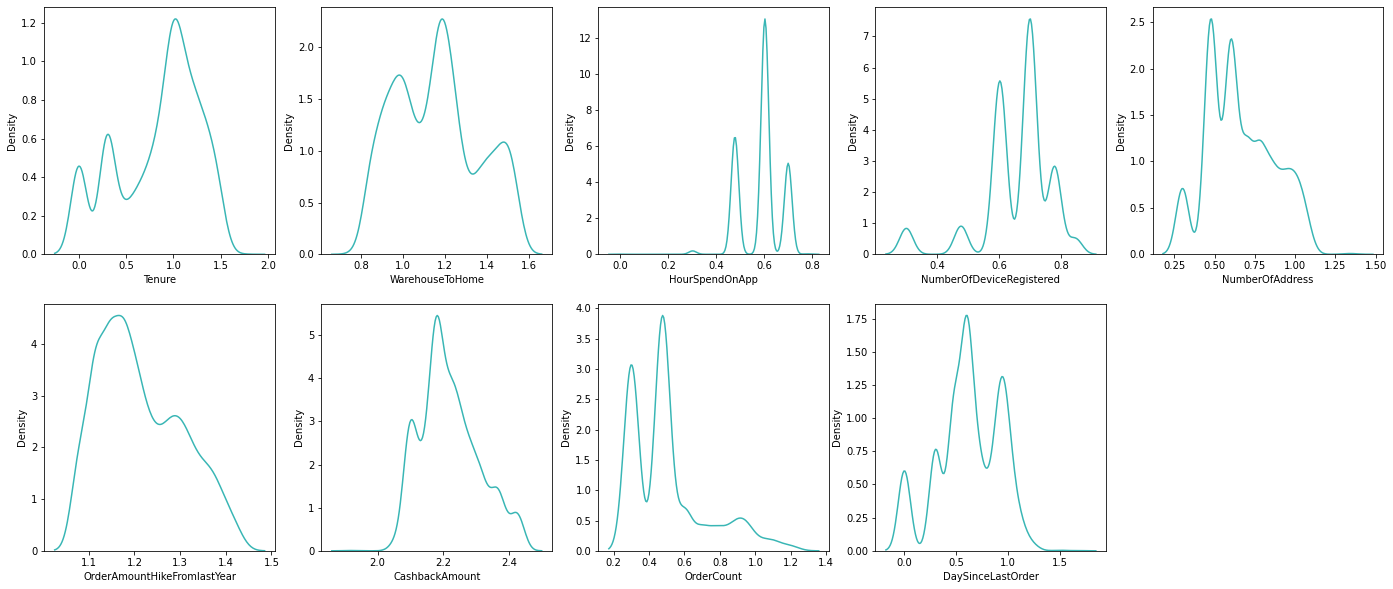

In [ ]:
#lakukan log transformation pada X_train untuk membuat fitur menjadi lebih terdistribusi secara normal.
transform = feature_normal + feature_non_normal
fig = plt.figure(figsize =(24,10) )

for j in range(len(transform)):
  var = transform[j]
  X_train[var] = np.log10(X_train[var]+1)

  sub = fig.add_subplot(2, 5, j + 1)
  sub.set_xlabel(var)
  #X_train[var].plot(kind = 'hist')
  sns.kdeplot(data= X_train[var])

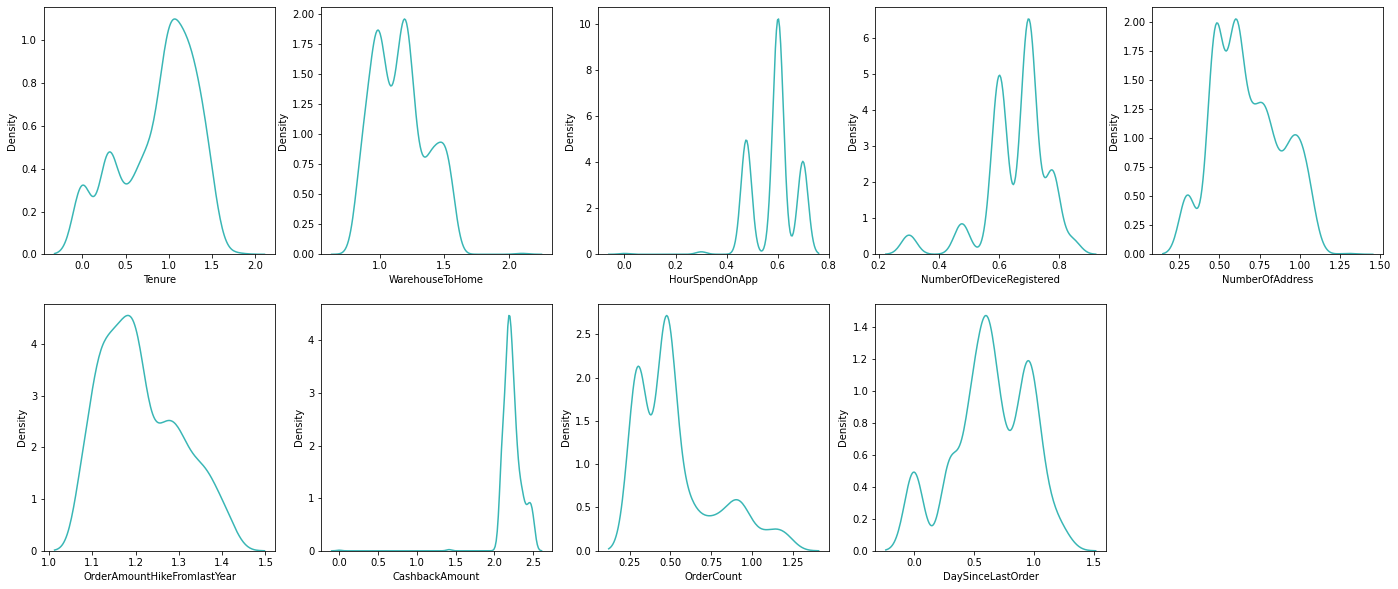

In [ ]:
# lakukan juga pada X_test
transform = feature_normal + feature_non_normal
fig = plt.figure(figsize =(24,10) )

for j in range(len(transform)):
  var = transform[j]
  X_test[var] = np.log10(X_test[var]+1)

  sub = fig.add_subplot(2, 5, j + 1)
  sub.set_xlabel(var)
  #X_test[var].plot(kind = 'hist')
  sns.kdeplot(data= X_test[var])

In [ ]:
# Lakukan standardization untuk menyesuaikan nilai antar feature. Data training kemudian di-scaling menggunakan StandarScaler kemudian dilakukan fit & transform, sedangkan pada data testing hanya dilakukan transform.
for i in nums_new:
    scaler = StandardScaler().fit(X_train[[i]])
    X_train[i] = scaler.transform(X_train[[i]])
    X_test[i] = scaler.transform(X_test[[i]])

In [ ]:
X_train.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
1787,0.360980,Computer,3,0.360698,Credit Card,Male,-1.349416,-0.489108,Fashion,1,Single,-0.894785,0,-0.409947,2.293534,0.932690,0.936169
2147,0.004468,Computer,3,-0.065491,Debit Card,Female,-3.518630,-0.489108,Laptop & Accessory,4,Married,-1.755264,0,0.462627,-0.955688,-0.480935,-0.686849
1717,0.255667,Mobile Phone,1,0.227622,Debit Card,Male,0.189665,0.384512,Laptop & Accessory,4,Single,1.862555,0,0.966872,-0.955688,-2.064316,0.018514
2292,0.830769,Mobile Phone,3,-0.403866,Debit Card,Male,0.189665,-0.489108,Fashion,4,Single,1.862555,1,0.966872,1.843040,0.932690,0.548088
5578,0.623224,Computer,1,-0.065491,Debit Card,Male,1.383469,1.098311,Laptop & Accessory,3,Married,0.189290,0,-1.094814,2.080826,1.102445,0.380682


In [ ]:
X_test.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
4006,0.948498,Computer,3,-0.804078,Debit Card,Male,1.383469,0.384512,Laptop & Accessory,1,Married,-0.284266,0,1.423018,2.080826,1.102445,0.476204
1969,1.353778,Mobile Phone,3,-0.065491,E wallet,Female,0.189665,0.384512,Fashion,1,Married,1.436691,1,0.721388,-0.955688,-0.066312,1.162834
4235,-0.149613,Mobile Phone,1,0.227622,Debit Card,Female,1.383469,0.384512,Laptop & Accessory,1,Single,-0.284266,0,2.034817,-0.137113,1.254296,0.129926
105,1.316055,Mobile Phone,1,-1.035353,Debit Card,Female,-1.349416,0.384512,Mobile,2,Single,1.436691,0,-0.101072,-0.137113,-0.480935,-1.071175
2295,-0.331851,Computer,3,-1.035353,Debit Card,Female,-1.349416,-0.489108,Fashion,3,Married,-0.894785,1,0.966872,2.293534,0.740237,0.904940


In [ ]:
######

In [ ]:
# df_eval
#klasifikasi apakah feature tersebut memiliki distribusi normal atau tidak berdasarkan nilai skew dan kurtosis
feature_trans = nums_new
feature_normal = []
feature_non_normal = []

for i in feature_trans:
  skw = skew(dfx_eval[i])
  kts = kurtosis(dfx_eval[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_non_normal.append(i)
  else:
    feature_non_normal.append(i)

print('Distribusi Normal:', feature_normal)
print('Distribusi Non Normal:', feature_non_normal)

Distribusi Normal: ['Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CashbackAmount']
Distribusi Non Normal: ['WarehouseToHome', 'OrderCount', 'DaySinceLastOrder']


In [ ]:
# # sebelum transformasi
# transform = feature_normal + feature_non_normal
# fig = plt.figure(figsize =(24,10) )

# for j in range(len(transform)):
#   var = transform[j]
#   #df2[var] = np.log10(df2[var]+1)

#   sub = fig.add_subplot(2, 5, j + 1)
#   sub.set_xlabel(var)
#   #df2[var].plot(kind = 'hist')
#   sns.kdeplot(data= dfx_eval[var])

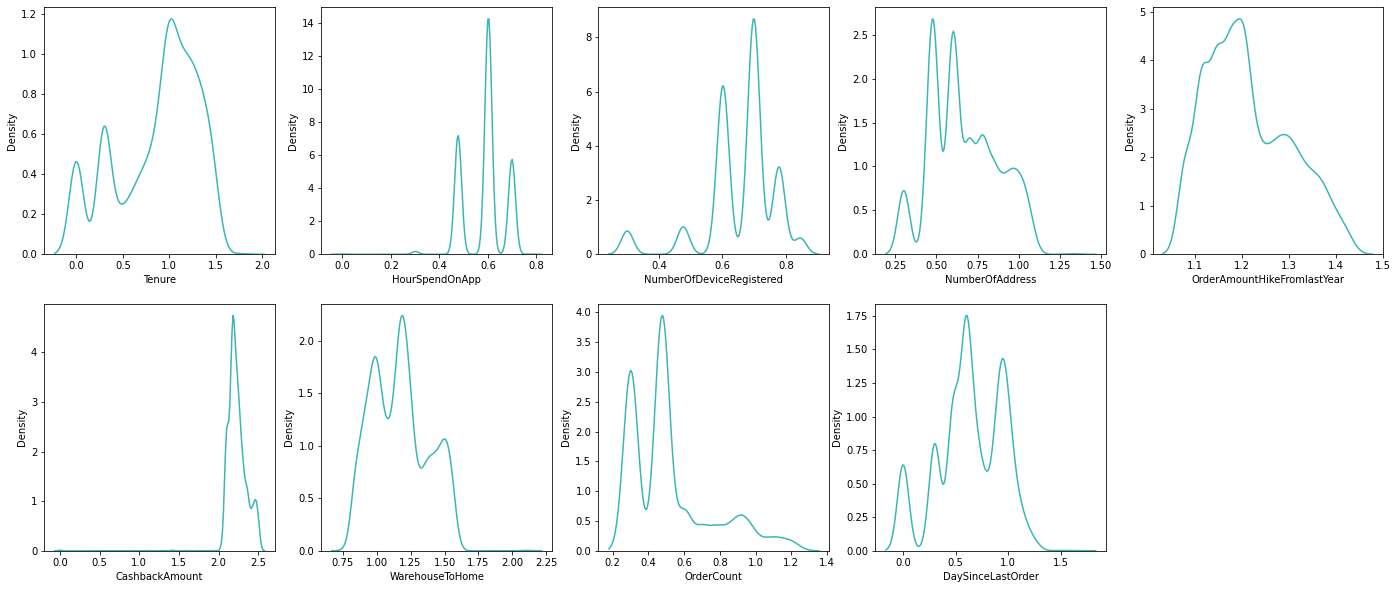

In [ ]:
#lakukan log transformation untuk membuat fitur menjadi lebih terdistribusi secara normal.
transform = feature_normal + feature_non_normal
fig = plt.figure(figsize =(24,10) )

for j in range(len(transform)):
  var = transform[j]
  dfx_eval[var] = np.log10(dfx_eval[var]+1)

  sub = fig.add_subplot(2, 5, j + 1)
  sub.set_xlabel(var)
  #df2[var].plot(kind = 'hist')
  sns.kdeplot(data= dfx_eval[var])

In [ ]:
#scaling
for i in nums_new:
    scaler = StandardScaler().fit(dfx_eval[[i]])
    dfx_eval[i] = scaler.transform(dfx_eval[[i]])

In [ ]:
print(dfx_eval.shape)
print(dfy_eval.shape)

(5630, 17)
(5630, 1)


## E. FEATURE ENCODING





In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#Feature Encoding untuk Data Nominal

df2['Gender'] = df2['Gender'].astype('category').cat.codes
df2['MaritalStatus'] = df2['MaritalStatus'].astype('category').cat.codes
df2['PreferredPaymentMode'] = df2['PreferredPaymentMode'].astype('category').cat.codes
df2['PreferredLoginDevice'] = df2['PreferredLoginDevice'].astype('category').cat.codes
df2['PreferedOrderCat'] = df2['PreferedOrderCat'].astype('category').cat.codes
df2['Complain'] = df2['Complain'].astype('category').cat.codes

# Feature Encoding untuk Data Ordinal
enc = OrdinalEncoder()
enc.fit(df2[["CityTier","SatisfactionScore"]])
df2[["CityTier","SatisfactionScore"]] = enc.transform(df2[["CityTier","SatisfactionScore"]])

In [ ]:
# train set

In [ ]:
X_train['Gender'] = X_train['Gender'].astype('category').cat.codes
X_train['MaritalStatus'] = X_train['MaritalStatus'].astype('category').cat.codes
X_train['PreferredPaymentMode'] = X_train['PreferredPaymentMode'].astype('category').cat.codes
X_train['PreferredLoginDevice'] = X_train['PreferredLoginDevice'].astype('category').cat.codes
X_train['PreferedOrderCat'] = X_train['PreferedOrderCat'].astype('category').cat.codes
X_train['Complain'] = X_train['Complain'].astype('category').cat.codes

# Feature Encoding untuk Data Ordinal
enc = OrdinalEncoder()
enc.fit(X_train[["CityTier","SatisfactionScore"]])
X_train[["CityTier","SatisfactionScore"]] = enc.transform(X_train[["CityTier","SatisfactionScore"]])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 1787 to 5140
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       3321 non-null   float64
 1   PreferredLoginDevice         3321 non-null   int8   
 2   CityTier                     3321 non-null   float64
 3   WarehouseToHome              3321 non-null   float64
 4   PreferredPaymentMode         3321 non-null   int8   
 5   Gender                       3321 non-null   int8   
 6   HourSpendOnApp               3321 non-null   float64
 7   NumberOfDeviceRegistered     3321 non-null   float64
 8   PreferedOrderCat             3321 non-null   int8   
 9   SatisfactionScore            3321 non-null   float64
 10  MaritalStatus                3321 non-null   int8   
 11  NumberOfAddress              3321 non-null   float64
 12  Complain                     3321 non-null   int8   
 13  OrderAmountHike

In [ ]:
X_train.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
1787,0.360980,0,2.0,0.360698,1,1,-1.349416,-0.489108,0,0.0,2,-0.894785,0,-0.409947,2.293534,0.932690,0.936169
2147,0.004468,0,2.0,-0.065491,2,0,-3.518630,-0.489108,2,3.0,1,-1.755264,0,0.462627,-0.955688,-0.480935,-0.686849
1717,0.255667,1,0.0,0.227622,2,1,0.189665,0.384512,2,3.0,2,1.862555,0,0.966872,-0.955688,-2.064316,0.018514
2292,0.830769,1,2.0,-0.403866,2,1,0.189665,-0.489108,0,3.0,2,1.862555,1,0.966872,1.843040,0.932690,0.548088
5578,0.623224,0,0.0,-0.065491,2,1,1.383469,1.098311,2,2.0,1,0.189290,0,-1.094814,2.080826,1.102445,0.380682


In [ ]:
# testing set

In [ ]:
# feature encoding data nominal
X_test['Gender'] = X_test['Gender'].astype('category').cat.codes
X_test['MaritalStatus'] = X_test['MaritalStatus'].astype('category').cat.codes
X_test['PreferredPaymentMode'] = X_test['PreferredPaymentMode'].astype('category').cat.codes
X_test['PreferredLoginDevice'] = X_test['PreferredLoginDevice'].astype('category').cat.codes
X_test['PreferedOrderCat'] = X_test['PreferedOrderCat'].astype('category').cat.codes
X_test['Complain'] = X_test['Complain'].astype('category').cat.codes

# Feature Encoding untuk Data Ordinal
#enc = OrdinalEncoder()
#enc.fit(X_train[["CityTier","SatisfactionScore"]])
X_test[["CityTier","SatisfactionScore"]] = enc.transform(X_test[["CityTier","SatisfactionScore"]]) # langsung transform berdasarkan yang difit ke train sebelumnya

In [ ]:
X_test.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
4006,0.948498,0,2.0,-0.804078,2,1,1.383469,0.384512,2,0.0,1,-0.284266,0,1.423018,2.080826,1.102445,0.476204
1969,1.353778,1,2.0,-0.065491,3,0,0.189665,0.384512,0,0.0,1,1.436691,1,0.721388,-0.955688,-0.066312,1.162834
4235,-0.149613,1,0.0,0.227622,2,0,1.383469,0.384512,2,0.0,2,-0.284266,0,2.034817,-0.137113,1.254296,0.129926
105,1.316055,1,0.0,-1.035353,2,0,-1.349416,0.384512,3,1.0,2,1.436691,0,-0.101072,-0.137113,-0.480935,-1.071175
2295,-0.331851,0,2.0,-1.035353,2,0,-1.349416,-0.489108,0,2.0,1,-0.894785,1,0.966872,2.293534,0.740237,0.904940


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3321, 17)
(1081, 17)
(3321, 1)
(1081, 1)


In [ ]:
# df_eval
#Feature Encoding untuk Data Nominal

dfx_eval['Gender'] = dfx_eval['Gender'].astype('category').cat.codes
dfx_eval['MaritalStatus'] = dfx_eval['MaritalStatus'].astype('category').cat.codes
dfx_eval['PreferredPaymentMode'] = dfx_eval['PreferredPaymentMode'].astype('category').cat.codes
dfx_eval['PreferredLoginDevice'] = dfx_eval['PreferredLoginDevice'].astype('category').cat.codes
dfx_eval['PreferedOrderCat'] = dfx_eval['PreferedOrderCat'].astype('category').cat.codes
dfx_eval['Complain'] = dfx_eval['Complain'].astype('category').cat.codes

# Feature Encoding untuk Data Ordinal
enc = OrdinalEncoder()
enc.fit(dfx_eval[["CityTier","SatisfactionScore"]])
dfx_eval[["CityTier","SatisfactionScore"]] = enc.transform(dfx_eval[["CityTier","SatisfactionScore"]])

In [ ]:
dfx_eval.sample(5)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
599,-2.003945,1,0.0,1.034636,1,0,-1.359105,0.368833,2,2.0,1,-0.938734,0,-0.095952,0.339536,-0.523943,-0.587907
4586,-0.405338,0,0.0,-0.841198,1,0,0.178437,0.368833,4,0.0,2,-0.938734,0,-0.095952,1.644277,1.023867,-0.428557
4716,1.305836,1,0.0,-0.120252,2,1,0.178437,0.368833,2,0.0,2,0.150185,0,0.742815,0.339536,-0.118634,-0.454494
4422,-0.071129,1,0.0,-0.841198,0,1,0.178437,1.096479,2,4.0,2,0.867438,0,-0.410951,-0.201981,0.452616,-0.517644
1854,-0.071129,0,0.0,-0.279040,2,1,-3.526149,-0.521733,2,0.0,1,0.150185,0,1.883042,0.759569,0.857925,0.127129


In [ ]:
print(dfx_eval.shape)
print(dfy_eval.shape)

(5630, 17)
(5630, 1)


## F. HANDLE CLASS IMBALANCE

In [ ]:
df2['Churn'] = df2['Churn'].astype(int)

In [ ]:
#bisa dicoba pake class weight 
#pembuatan binary label target
df2['Churn_Class'] = df2['Churn'] > 0.7
df2['Churn_Class'].value_counts()

False    3255
True      647
Name: Churn_Class, dtype: int64

In [ ]:
# pemisahan features vs target
Ximb = df2[[col for col in df2.columns if (str(df2[col].dtype) != 'object') and col not in ['Churn', 'Churn_Class']]]
yimb = df2['Churn_Class'].values
print(Ximb.shape)
print(yimb.shape)

(3902, 17)
(3902,)


In [ ]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(sampling_strategy=0.5, random_state=42).fit_resample(Ximb, yimb)
X_over, y_over = over_sampling.RandomOverSampler(sampling_strategy=0.5, random_state=42).fit_resample(Ximb, yimb)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(sampling_strategy=0.5, random_state=42).fit_resample(Ximb, yimb)

In [ ]:
print('Original')
print(pd.Series(yimb).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    3255
True      647
dtype: int64


UNDERSAMPLING
False    1294
True      647
dtype: int64


OVERSAMPLING
False    3255
True     1627
dtype: int64


SMOTE
False    3255
True     1627
dtype: int64


In [ ]:
df2['Churn'].value_counts(normalize=True)

0    0.834188
1    0.165812
Name: Churn, dtype: float64

**Pakai data setelah split, traintest terbaru**

In [ ]:
X_train_imb = X_train.copy()
y_train_imb = y_train.copy()

In [ ]:
y_train_imb['Churn_Class'] = y_train_imb['Churn'] > 0.7
y_train_imb['Churn_Class'].value_counts()

False    2755
True      566
Name: Churn_Class, dtype: int64

In [ ]:
# X_train_imb 
y_train_imb = y_train_imb['Churn_Class'].values
print(X_train_imb.shape)
print(y_train_imb.shape)

(3321, 17)
(3321,)


In [ ]:
X_train_under, y_train_under = under_sampling.RandomUnderSampler(sampling_strategy=0.5, random_state=42).fit_resample(X_train_imb, y_train_imb)
X_train_over, y_train_over = over_sampling.RandomOverSampler(sampling_strategy=0.5, random_state=42).fit_resample(X_train_imb, y_train_imb)
X_train_SMOTE, y_train_SMOTE = over_sampling.SMOTE(sampling_strategy=0.5, random_state=42).fit_resample(X_train_imb, y_train_imb)

In [ ]:
print('Original')
print(pd.Series(y_train_imb).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_train_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_train_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_train_SMOTE).value_counts())

Original
False    2755
True      566
dtype: int64


UNDERSAMPLING
False    1132
True      566
dtype: int64


OVERSAMPLING
False    2755
True     1377
dtype: int64


SMOTE
False    2755
True     1377
dtype: int64


In [ ]:
# train set setelah handle imbalance jadikan tipe int lagi
y_train_imb = y_train_imb.astype(int)
y_train_under = y_train_under.astype(int)
y_train_over = y_train_over.astype(int)
y_train_SMOTE = y_train_SMOTE.astype(int)


In [ ]:
print('Original')
print(pd.Series(y_train_imb).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_train_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_train_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_train_SMOTE).value_counts())

Original
0    2755
1     566
dtype: int64


UNDERSAMPLING
0    1132
1     566
dtype: int64


OVERSAMPLING
0    2755
1    1377
dtype: int64


SMOTE
0    2755
1    1377
dtype: int64


In [ ]:
# jadikan dataframe y_train setelah handleimbalance
y_train_imb = pd.DataFrame(y_train_imb, columns = ['Churn'])
y_train_under = pd.DataFrame(y_train_under, columns = ['Churn'])
y_train_over = pd.DataFrame(y_train_over, columns = ['Churn'])
y_train_SMOTE = pd.DataFrame(y_train_SMOTE, columns = ['Churn'])

## Other Important Features

1. Umur: Karena churn dapat dipengaruhi oleh usia customer, menambahkan fitur umur dapat membantu model untuk memprediksi churn dengan lebih baik.

2. Frekuensi penggunaan aplikasi selama sehari: Frekuensi penggunaan aplikasi oleh customer dapat memberikan insight tentang seberapa sering customer menggunakan layanan yang ditawarkan oleh perusahaan. Jika frekuensi penggunaan rendah, maka kemungkinan customer akan churn lebih besar.

3. Tanggal: memprediksi churn, seperti tren waktu atau efek musiman.

4. customer reviews/feedback : Dengan memahami tingkat kepuasan pelanggan, perusahaan dapat secara proaktif mengidentifikasi dan mengatasi masalah yang mungkin mendorong churn pelanggan.

5. Tanggal registrasi : Berapa lama customer dalam menggunakan layanan, customer yang lama cenderung akan lebih bertahan daripada pengguna baru.

In [ ]:
# # download train test set

# from google.colab import files
# X_train_under.to_csv('X_train_under.csv', index = False)
# X_test.to_csv('X_test.csv', index = False)
# y_train_under.to_csv('y_train_under.csv', index = False)
# y_test.to_csv('y_test.csv', index = False)

# X_train_over.to_csv('X_train_over.csv', index = False)
# y_train_SMOTE.to_csv('y_train_SMOTE.csv', index = False)
# X_train_SMOTE.to_csv('X_train_SMOTE.csv', index = False)
# y_train_over.to_csv('y_train_over.csv', index = False)

# files.download('X_train_under.csv')
# files.download('X_test.csv')
# files.download('y_train_under.csv')
# files.download('y_test.csv')

# files.download('X_train_over.csv')
# files.download('y_train_SMOTE.csv')
# files.download('X_train_SMOTE.csv')
# files.download('y_train_over.csv')

In [ ]:
# # original train
# X_train_imb.to_csv('X_train_imb.csv', index = False)
# y_train_imb.to_csv('y_train_imb.csv', index = False)

# files.download('X_train_imb.csv')
# files.download('y_train_imb.csv')

# STAGE-3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
# from google.colab import files
# uploaded = files.upload()

download [**data**](https://drive.google.com/file/d/1_zBbLEDaSsQY9lZCZjsoinQMteOx0xQB/view?usp=sharing). 

In [ ]:
# # load data
# # X_train
# X_train_under = pd.read_csv('X_train_under.csv')
# X_train_over = pd.read_csv('X_train_over.csv')
# X_train_SMOTE = pd.read_csv('X_train_SMOTE.csv')
# # y_train
# y_train_under = pd.read_csv('y_train_under.csv')
# y_train_over = pd.read_csv('y_train_over.csv')
# y_train_SMOTE = pd.read_csv('y_train_over.csv')
# # test set
# X_test = pd.read_csv('X_test.csv')
# y_test = pd.read_csv('y_test.csv')
# # ori
# X_train_imb = pd.read_csv('X_train_imb.csv')
# y_train_imb = pd.read_csv('y_train_imb.csv')

# Modelling

## Model Evaluasi (default)





In [ ]:
# Model Evaluation - cross validation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_cv(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_SMOTE)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_SMOTE, y_pred_proba_train[:, 1]))
    score = cross_validate(model, X_train_SMOTE, y_train_SMOTE, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval validation): '+ str(score['test_score'].mean()))

def show_feature_importance1(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train_SMOTE.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_SMOTE, y_train_SMOTE)
eval_cv(logreg)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.56
Recall (Test Set): 0.67
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.8887808439276392
roc_auc (crossval validation): 0.8837338986009389


## K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train_SMOTE, y_train_SMOTE)
eval_cv(knn)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.72
Recall (Test Set): 0.91
F1-Score (Test Set): 0.80
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.993136448694294
roc_auc (crossval validation): 0.9735933325203427


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_SMOTE, y_train_SMOTE)
eval_cv(dt)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.87
Recall (Test Set): 0.88
F1-Score (Test Set): 0.88
roc_auc (test-proba): 0.93
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval validation): 0.8825972874806615


## ADABoost

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

# ada = AdaBoostClassifier(random_state=42)
# ada.fit(X_train_SMOTE, y_train_SMOTE)
# eval_classification(ada)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_SMOTE, y_train_SMOTE)
eval_cv(ada)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.66
Recall (Test Set): 0.67
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.94
roc_auc (crossval train): 0.9434676087365264
roc_auc (crossval validation): 0.9226115913335198


## XGBoost

In [ ]:
# from xgboost import XGBClassifier

# xg = XGBClassifier(random_state=42)
# xg.fit(X_train_SMOTE, y_train_SMOTE)
# eval_classification(xg)

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train_SMOTE, y_train_SMOTE)
eval_cv(xg)

Accuracy (Test Set): 0.98
Precision (Test Set): 0.98
Recall (Test Set): 0.92
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval validation): 0.9815099340282012


## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf = rf.fit(X_train_SMOTE, y_train_SMOTE)

eval_cv(rf)

Accuracy (Test Set): 0.98
Precision (Test Set): 0.97
Recall (Test Set): 0.92
F1-Score (Test Set): 0.94
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval validation): 0.985189974390795


In [ ]:
# eval
def eval_classification(model):
    y_pred = model.predict(X_test)
    #y_pred_train = model.predict(X_train_SMOTE)
    y_pred_proba = model.predict_proba(X_test)
    #y_pred_proba_train = model.predict_proba(X_train_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    #print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_SMOTE, y_pred_proba_train[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train_SMOTE.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [ ]:
# evaluasi model tanpa tuning
eval_classification(rf)

Accuracy (Test Set): 0.98
Precision (Test Set): 0.97
Recall (Test Set): 0.92
F1-Score (Test Set): 0.94
roc_auc (test-proba): 0.99


## Hyperparameter Tuning



In [ ]:
# # Hyperparameter Tuning RandomForest
# from sklearn.model_selection import RandomizedSearchCV

# n_estimators = [int(x) for x in np.linspace(700, 800, 50)]
# criterion = ['gini', 'entropy']
# max_depth = [int(x) for x in np.linspace(2, 100, 50)]
# min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
# min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
# hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
#                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# rf = RandomForestClassifier(random_state=42)
# rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
# rs.fit(X_train_SMOTE, y_train_SMOTE)
# eval_classification(rs)

In [ ]:
# rs.best_params_

In [ ]:
# Hyperparameter Tuning RandomForest

In [ ]:
# eval
def eval_classification(model):
    y_pred = model.predict(X_test)
    #y_pred_train = model.predict(X_train_SMOTE)
    y_pred_proba = model.predict_proba(X_test)
    #y_pred_proba_train = model.predict_proba(X_train_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    #print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_SMOTE, y_pred_proba_train[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train_SMOTE.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [ ]:
# Hyperparameter Tuning RandomForest
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(700, 800, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rft = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rft, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs = rs.fit(X_train_SMOTE, y_train_SMOTE)

eval_classification(rs)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.89
Recall (Test Set): 0.82
F1-Score (Test Set): 0.85
roc_auc (test-proba): 0.98


In [ ]:
rs.best_params_

{'n_estimators': 736,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_depth': 46,
 'criterion': 'gini'}

In [ ]:
# rs with best params

rsb = RandomForestClassifier(random_state=42, 
                             n_estimators =  736, 
                             min_samples_split =  12,
                             min_samples_leaf =  2,
                             max_depth =  46,
                             criterion =  'gini')
rsb = rsb.fit(X_train_SMOTE, y_train_SMOTE)

In [ ]:
# eval_classification(rsb)

### Learning Curve

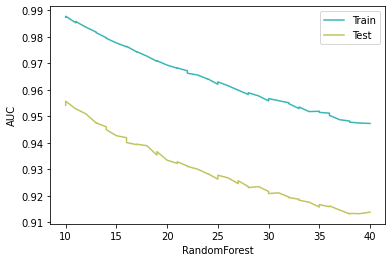

In [ ]:
param_values = [int(x) for x in np.linspace(10, 40, 50)] # min_samples_leaf
train_scores = []
test_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=736, min_samples_leaf=i)
    model.fit(X_train_SMOTE, y_train_SMOTE)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train_SMOTE)
    train_auc = roc_auc_score(y_train_SMOTE, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    #print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.ylabel('AUC')
plt.xlabel('RandomForest')
plt.legend()
plt.show()

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

### test set

In [ ]:
y_pred_SMOTE = rf.predict(X_test)
print(classification_report(y_test, y_pred_SMOTE))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       900
           1       0.97      0.92      0.94       181

    accuracy                           0.98      1081
   macro avg       0.97      0.96      0.96      1081
weighted avg       0.98      0.98      0.98      1081



In [ ]:
# sns.set(font_scale=1.2)

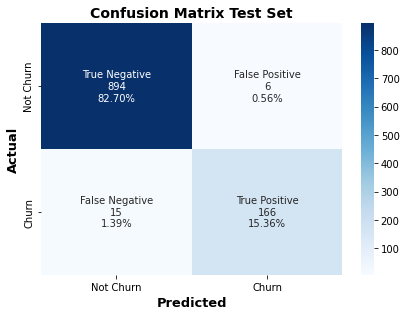

In [ ]:
# confusion matrix pada test set | randomforest tanpa tuning
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_SMOTE)

# plot confusion matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
target_names = ["Not Churn","Churn"]

sns.heatmap(cm, annot=labels, xticklabels = target_names, yticklabels = target_names, fmt='', cmap='Blues')
plt.title('Confusion Matrix Test Set', size =14, fontweight = 'bold')
plt.xlabel('Predicted', size =13, fontweight = 'bold')
plt.ylabel('Actual', size =13, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [ ]:
# y_test_pred = rs.predict_proba(X_test)[:,1] > 0.5
# print(classification_report(y_test, y_test_pred, labels=[1,0]))

In [ ]:
# dengan hyperparameter tuning
y_test_pred = rs.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       900
           1       0.89      0.82      0.85       181

    accuracy                           0.95      1081
   macro avg       0.93      0.90      0.91      1081
weighted avg       0.95      0.95      0.95      1081



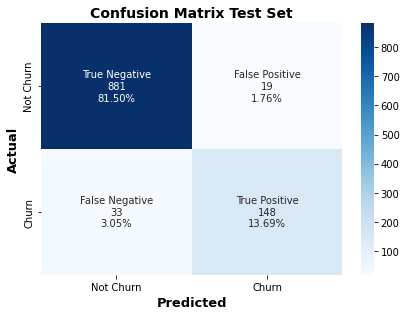

In [ ]:
# confusion matrix pada test set | randomforest dengan tuning
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
# calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# plot confusion matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
target_names = ["Not Churn","Churn"]

sns.heatmap(cm, annot=labels, xticklabels = target_names, yticklabels = target_names, fmt='', cmap='Blues')
plt.title('Confusion Matrix Test Set', size =14, fontweight = 'bold')
plt.xlabel('Predicted', size =13, fontweight = 'bold')
plt.ylabel('Actual', size =13, fontweight = 'bold')
plt.tight_layout()
plt.show()

### data original

In [ ]:
# data original | randomforest tanpa tuning
dfx_predrf = rf.predict(dfx_eval)
print(classification_report(dfy_eval, dfx_predrf))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4682
           1       0.83      0.93      0.88       948

    accuracy                           0.96      5630
   macro avg       0.91      0.95      0.93      5630
weighted avg       0.96      0.96      0.96      5630



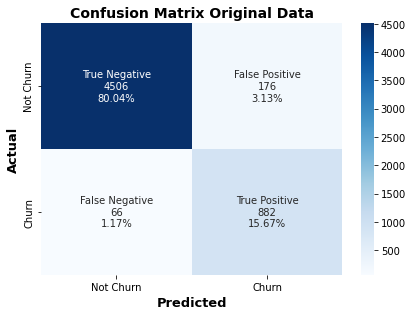

In [ ]:
# confusion matrix pada test set | randomforest tanpa tuning
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
# calculate confusion matrix
cm = confusion_matrix(dfy_eval, dfx_predrf)

# plot confusion matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
target_names = ["Not Churn","Churn"]

sns.heatmap(cm, annot=labels, xticklabels = target_names, yticklabels = target_names, fmt='', cmap='Blues')
plt.title('Confusion Matrix Original Data', size =14, fontweight = 'bold')
plt.xlabel('Predicted', size =13, fontweight = 'bold')
plt.ylabel('Actual', size =13, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [ ]:
# data original | prediksi model tuned
dfx_predrs = rs.predict(dfx_eval)
print(classification_report(dfy_eval, dfx_predrs))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4682
           1       0.72      0.85      0.78       948

    accuracy                           0.92      5630
   macro avg       0.85      0.89      0.87      5630
weighted avg       0.93      0.92      0.92      5630



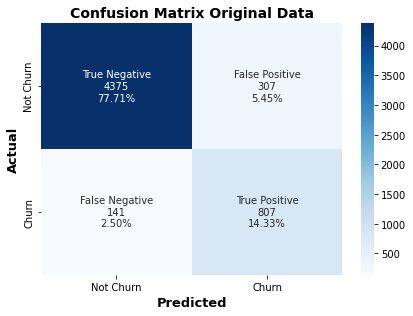

In [ ]:
# confusion matrix pada original data | randomforest dengan anpa tuning
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
# calculate confusion matrix
cm = confusion_matrix(dfy_eval, dfx_predrs)

# plot confusion matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
target_names = ["Not Churn","Churn"]

sns.heatmap(cm, annot=labels, xticklabels = target_names, yticklabels = target_names, fmt='', cmap='Blues')
plt.title('Confusion Matrix Original Data', size =14, fontweight = 'bold')
plt.xlabel('Predicted', size =13, fontweight = 'bold')
plt.ylabel('Actual', size =13, fontweight = 'bold')
plt.tight_layout()
plt.show()

## Before- after (konvensional-model)

In [ ]:
X_test_c['Tenure'].describe()

count    1081.000000
mean       10.189639
std         8.444707
min         0.000000
25%         3.000000
50%         9.000000
75%        15.000000
max        60.000000
Name: Tenure, dtype: float64

In [ ]:
X_test_c.Tenure.unique()

array([17., 26.,  5., 25.,  4., 24., 12., 19., 20., 16.,  0., 22.,  2.,
        9.,  8., 10., 18., 15.,  7.,  6.,  3.,  1., 13., 27., 28., 30.,
       11., 31., 14., 51., 21., 23., 29., 60.])

In [ ]:
# kolom baru churn berdasarkan tenure | diatas atau sama median tidak churn dibawah itu churn
X_test_c['yc'] = np.where(X_test_c['Tenure'] >= 9 , 0, 1)

In [ ]:
X_test_c.sample(5)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount,yc
4679,3.0,Computer,1,7.0,Debit Card,Male,4.0,6,Mobile Phone,1,Married,3,0,19.0,3.0,9.0,152.20,1
192,15.0,Mobile Phone,1,14.0,Credit Card,Male,2.0,4,Laptop & Accessory,4,Divorced,3,0,15.0,7.0,7.0,149.41,0
5201,2.0,Mobile Phone,3,12.0,Credit Card,Male,3.0,4,Laptop & Accessory,5,Single,2,0,19.0,2.0,3.0,209.63,1
887,9.0,Computer,3,6.0,Debit Card,Female,2.0,5,Mobile Phone,3,Single,2,0,12.0,1.0,0.0,113.59,0
4091,29.0,Mobile Phone,2,33.0,UPI,Male,4.0,2,Others,4,Married,6,1,15.0,2.0,5.0,321.36,0


In [ ]:
# pisahkan feature dan terget
X_test_cc = X_test_c.drop('yc', axis =1)
y_pred_cc = X_test_c[['yc']] #sebagai prediksi churn dan tidak churn cara konvensional

In [ ]:
# classification report
print(classification_report(y_test, y_pred_cc))

              precision    recall  f1-score   support

           0       0.92      0.60      0.73       900
           1       0.27      0.76      0.40       181

    accuracy                           0.62      1081
   macro avg       0.60      0.68      0.56      1081
weighted avg       0.82      0.62      0.67      1081



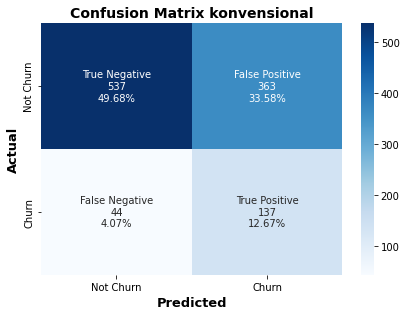

In [ ]:
#confusion matrix before (konvensional)
# confusion matrix pada test set | randomforest tanpa tuning
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_cc)

# plot confusion matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
target_names = ["Not Churn","Churn"]

sns.heatmap(cm, annot=labels, xticklabels = target_names, yticklabels = target_names, fmt='', cmap='Blues')
plt.title('Confusion Matrix konvensional', size =14, fontweight = 'bold')
plt.xlabel('Predicted', size =13, fontweight = 'bold')
plt.ylabel('Actual', size =13, fontweight = 'bold')
plt.tight_layout()
plt.show()

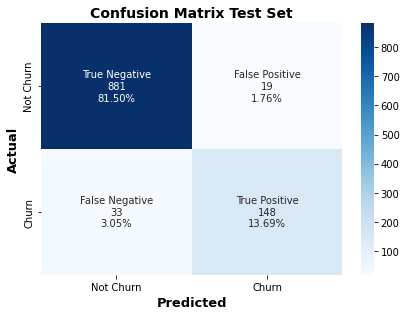

In [ ]:
# after, yang model

## K-Fold Cross Validation

### Check Train & Validation pada masing-masing iterasi

In [ ]:
from sklearn.model_selection import KFold

import pandas as pd


kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validatorprint(kf)

5

### Cross Validation in Validation Set Only

In [ ]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
result = cross_val_score(model, X_train_SMOTE, y_train_SMOTE, cv=kf, scoring='roc_auc')
result.mean()

0.986794911634413

### Cross Validation in Train Set & Validation Set

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
model = RandomForestClassifier()
score = cross_validate(model, X_train_SMOTE, y_train_SMOTE, cv=kf, scoring='roc_auc', return_train_score=True)
print('roc_auc (train): '+ str(score['train_score'].mean()))
print('roc_auc (validation): '+ str(score['test_score'].mean()))

roc_auc (train): 1.0
roc_auc (validation): 0.9865391740615262


# Feature Importance

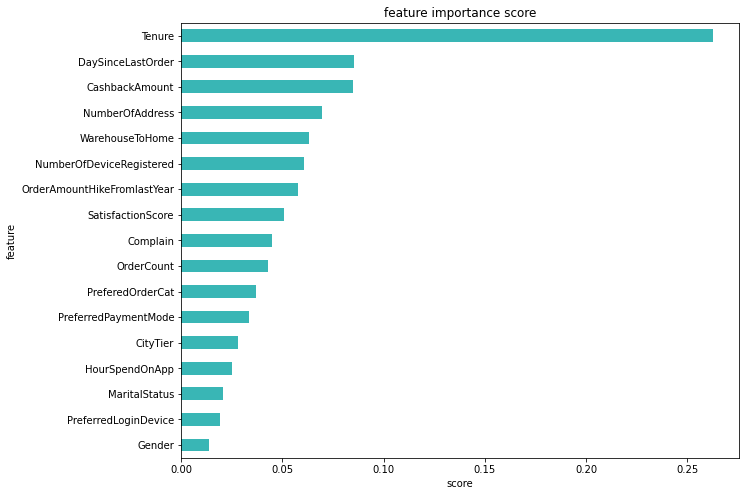

In [ ]:
show_feature_importance1(rf)

In [ ]:
rf

RandomForestClassifier(random_state=42)

In [ ]:
rsb

RandomForestClassifier(max_depth=46, min_samples_leaf=2, min_samples_split=12,
                       n_estimators=736, random_state=42)

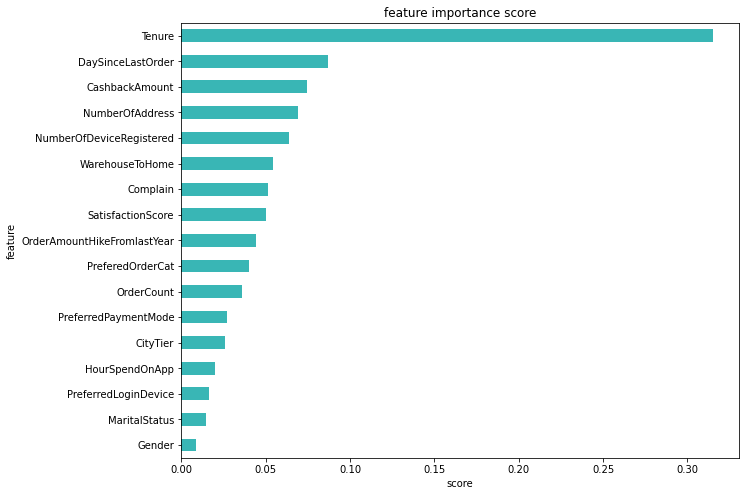

In [ ]:
# yang tuninig, dengan best_params
show_feature_importance(rsb)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.0 MB/s eta 0:00:00


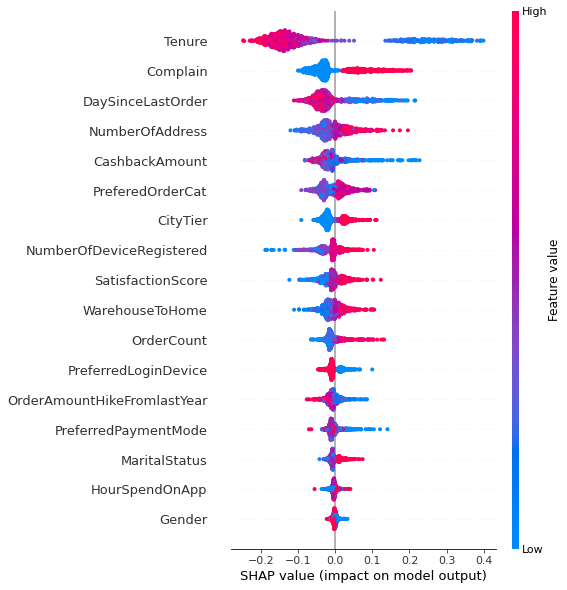

In [ ]:
!pip install shap
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

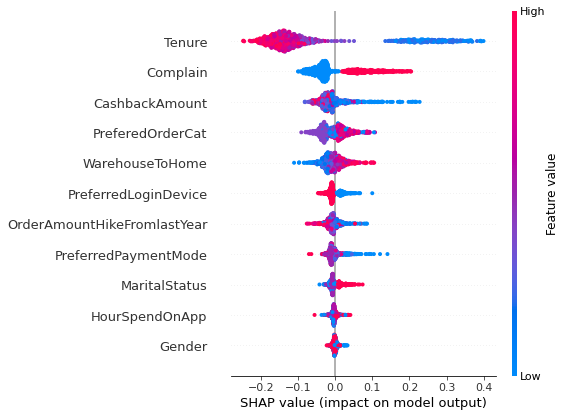

In [ ]:
# beberapa fitur dihide

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap_values_fl = pd.DataFrame(shap_values[1])
shap_values_fl.columns = X_test.columns

shap_values_fl = shap_values_fl.drop(['DaySinceLastOrder', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
                                      'NumberOfAddress', 'OrderCount', 'CityTier'], axis=1 )
X_test_fl = X_test[shap_values_fl.columns]

shap.summary_plot(np.array(shap_values_fl), X_test_fl)

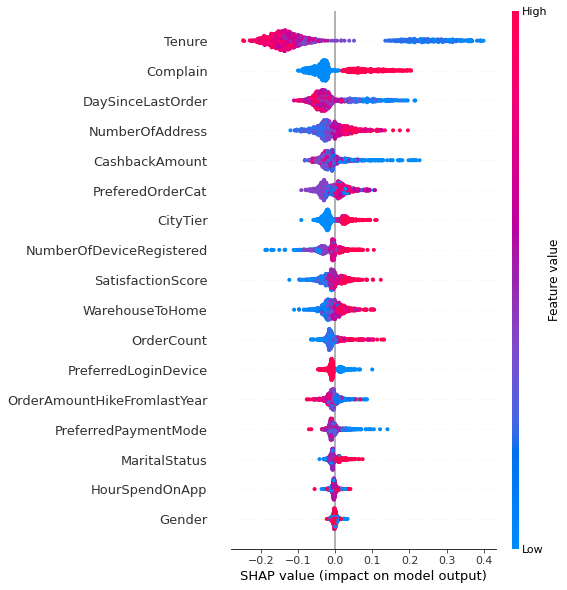

In [ ]:
# yang tuning, dengan best_params
explainer_rsb = shap.TreeExplainer(rsb)
shap_values_rsb= explainer.shap_values(X_test)

shap.summary_plot(shap_values_rsb[1], X_test)

In [ ]:
X_test.columns

Index(['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder',
       'CashbackAmount'],
      dtype='object')

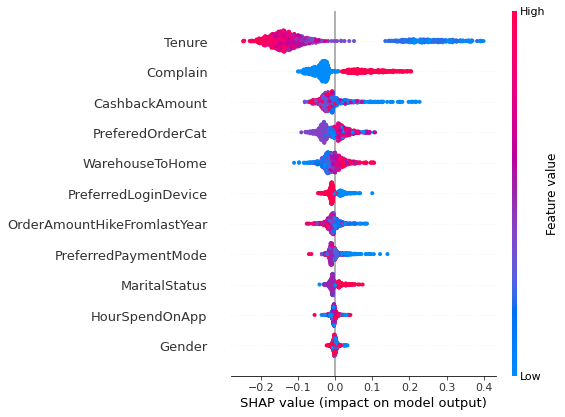

In [ ]:
# beberapa fitur dihide

explainer_rsb = shap.TreeExplainer(rsb)
shap_values_rsb= explainer.shap_values(X_test)

shap_values_fl = pd.DataFrame(shap_values[1])
shap_values_fl.columns = X_test.columns

shap_values_fl = shap_values_fl.drop(['DaySinceLastOrder', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
                                      'NumberOfAddress', 'OrderCount', 'CityTier'], axis=1 )
X_test_fl = X_test[shap_values_fl.columns]

shap.summary_plot(np.array(shap_values_fl), X_test_fl)

## Business Insight & Feature Importance

### Feature Importance
Sesuai dengan hasil feature importance menggunakan data yang telah di tuning dengan best params, terdapat top 5 fitur yang mempengaruhi hasil prediksi Churn, yaitu:
1. Tenure 
2. Day since last order
3. Number of address
4. Cashback amount
5. Number of device registered

### Business Insight 
Hasil dari model cenderung memprediksi jumlah churn yang lebih tinggi daripada yang sebenarnya terjadi. Hal ini dapat memberi perusahaan kesempatan untuk mengambil tindakan lebih awal untuk mencegah churn sebelum itu terjadi.

Dalam memanfaatkan prediksi ini, perusahaan dapat melakukan beberapa tindakan, antara lain:

1. Menjaga komunikasi yang baik dengan pelanggan yang telah diprediksi akan churn, dan menawarkan insentif atau promosi khusus untuk mempertahankan mereka sebagai pelanggan.

2. Meningkatkan layanan pelanggan dengan memberikan pengalaman yang lebih baik dan responsif, mengatasi masalah pelanggan secara cepat, dan meningkatkan kepuasan pelanggan secara keseluruhan.

3. Memantau dan menganalisis data pelanggan secara terus-menerus untuk memperbaiki model prediksi dan meningkatkan kinerja bisnis.

4. Mengembangkan strategi pemasaran yang efektif untuk menarik pelanggan baru dan mempertahankan pelanggan yang ada.

5. Menerapkan program reward atau insentif bagi pelanggan yang memperpanjang durasi penggunaan produk atau layanan.

Dalam kesimpulannya, meskipun false negative terkadang dianggap sebagai masalah dalam prediksi, hal ini dapat memberi peluang bagi perusahaan untuk mencegah churn sebelum terjadi. Oleh karena itu, penting bagi perusahaan untuk memanfaatkan prediksi ini secara efektif dan mengambil tindakan yang tepat untuk meningkatkan retensi pelanggan dan kinerja bisnis secara keseluruhan.

### Action Item

Berikut beberapa action item yang dapat diambil berdasarkan insight tersebut:

1. Menjaga komunikasi yang baik dengan pelanggan dan memberikan pengalaman yang lebih baik: Perusahaan dapat meningkatkan kualitas layanan pelanggan dengan meningkatkan responsifitas, mengatasi masalah pelanggan dengan cepat, dan memastikan kepuasan pelanggan secara keseluruhan. Selain itu, dengan menjaga komunikasi yang baik dengan pelanggan yang diprediksi akan churn, perusahaan dapat menawarkan insentif khusus atau promosi untuk mempertahankan mereka sebagai pelanggan.

2. Meningkatkan retensi pelanggan: Perusahaan dapat memperpanjang durasi penggunaan produk atau layanan dengan memberikan program reward atau insentif bagi pelanggan yang memperpanjang durasi penggunaan.

3. Memantau dan menganalisis data pelanggan secara terus-menerus: Perusahaan dapat memantau dan menganalisis data pelanggan secara terus-menerus untuk memperbaiki model prediksi dan meningkatkan kinerja bisnis.

4. Mengembangkan strategi pemasaran yang efektif: Perusahaan dapat mengembangkan strategi pemasaran yang efektif untuk menarik pelanggan baru dan mempertahankan pelanggan yang ada, dengan mempertimbangkan faktor-faktor yang dapat memengaruhi churn.

5. Melakukan evaluasi faktor-faktor lain yang memengaruhi churn: Perusahaan dapat melakukan evaluasi faktor-faktor lain yang dapat memengaruhi churn, seperti kualitas produk atau layanan, biaya, persaingan di pasar, dll. dan memperbarui model dengan faktor-faktor tersebut.

Dengan mengambil tindakan yang tepat berdasarkan insight tersebut, perusahaan dapat meningkatkan retensi pelanggan dan kinerja bisnis secara keseluruhan.

____

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# # load data
# # X_train
# X_train_under = pd.read_csv('X_train_under.csv')
# X_train_over = pd.read_csv('X_train_over.csv')
# X_train_SMOTE = pd.read_csv('X_train_SMOTE.csv')
# # y_train
# y_train_under = pd.read_csv('y_train_under.csv')
# y_train_over = pd.read_csv('y_train_over.csv')
# y_train_SMOTE = pd.read_csv('y_train_over.csv')
# # test set
# X_test = pd.read_csv('X_test.csv')
# y_test = pd.read_csv('y_test.csv')
# # ori
# X_train_imb = pd.read_csv('X_train_imb.csv')
# y_train_imb = pd.read_csv('y_train_imb.csv')

In [ ]:
X_BI=X_test
y_BI=y_test

In [ ]:
X_BI.shape

(1081, 17)

In [ ]:
y_BI.shape

(1081, 1)

In [ ]:
# Hitung nilai rata-rata dari kolom "tenure"
avgtenure = X_BI['Tenure'].mean()

# Hitung jumlah data yang akan diubah menjadi di atas rata-rata
n = math.ceil(len(X_BI) * 0.1)

# Urutkan DataFrame berdasarkan kolom "tenure" secara ascending
X_BI = X_BI.sort_values('Tenure', ascending=True)

# Ambil 10% data dengan nilai "tenure" terkecil, yaitu sebanyak "n" data
X_BI_low = X_BI.head(n)

# Perbarui nilai "tenure" dari data yang dipilih menjadi nilai rata-rata ditambah selisih antara nilai rata-rata dan nilai "tenure" tersebut
X_BI_low['Tenure'] = avgtenure + (avgtenure - X_BI_low['Tenure'])

# Gabungkan kembali DataFrame yang telah diubah dengan DataFrame asli
X_BI = pd.merge(X_BI_low, X_BI.drop(X_BI_low.index), how='outer')

# Tampilkan hasil
print(X_BI)

        Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0     2.117441                     1       0.0         0.085954   
1     2.117441                     1       0.0        -1.293897   
2     2.117441                     1       2.0         0.085954   
3     2.117441                     1       0.0        -0.403866   
4     2.117441                     1       2.0        -0.594863   
...        ...                   ...       ...              ...   
1076  1.523600                     0       2.0        -0.804078   
1077  1.523600                     1       2.0        -1.293897   
1078  1.523600                     1       1.0        -0.065491   
1079  2.008886                     1       0.0        -1.293897   
1080  2.168444                     1       2.0         1.456028   

      PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                        2       1       -1.349416                 -3.202819   
1                        0       1 

In [ ]:
X_BI['Tenure'].describe()

count    1081.000000
mean        0.474548
std         0.915216
min        -1.247724
25%        -0.149613
50%         0.543218
75%         1.053811
max         2.168444
Name: Tenure, dtype: float64

In [ ]:
X_test['Tenure'].describe()

count    1081.000000
mean        0.088443
std         0.993396
min        -1.940555
25%        -0.554893
50%         0.360980
75%         0.830769
max         2.168444
Name: Tenure, dtype: float64

In [ ]:
n_complain = len(X_BI[X_BI['Complain'] == 1]) // 10  # Ambil 10% data "complain" yang bernilai 1
# Ambil 10% data "complain" yang bernilai 1, yaitu sebanyak "n_complain" data
X_BI_complain = X_BI[X_BI['Complain'] == 1].head(n_complain)
# Perbarui nilai "complain" dari data yang dipilih menjadi 0
X_BI_complain['Complain'] = 0

X_BI = pd.merge(X_BI_complain, X_BI.drop(X_BI_complain.index), how='outer')


In [ ]:
X_BI['Complain'].describe()

count    1081.000000
mean        0.270120
std         0.444227
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Complain, dtype: float64

In [ ]:
X_test['Complain'].describe()

count    1081.000000
mean        0.299722
std         0.458348
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Complain, dtype: float64

In [ ]:
# Hitung rata-rata dari seluruh nilai dalam kolom "CashbackAmount"
avg_cashback = X_BI['CashbackAmount'].mean()

# Hitung jumlah data yang akan diubah menjadi di atas rata-rata
n = math.ceil(len(X_BI) * 0.1)

# Urutkan DataFrame berdasarkan kolom "CashbackAmount" secara ascending
X_BI = X_BI.sort_values('CashbackAmount', ascending=True)

# Ambil 10% data dengan nilai "CashbackAmount" terkecil, yaitu sebanyak "n" data
X_BI_low = X_BI.head(n)

# Perbarui nilai "CashbackAmount" dari data yang dipilih menjadi nilai rata-rata ditambah selisih antara nilai rata-rata dan nilai "CashbackAmount" tersebut
X_BI_low['CashbackAmount'] = avg_cashback + (avg_cashback - X_BI_low['CashbackAmount'])

# Gabungkan kembali DataFrame yang telah diubah dengan DataFrame asli
X_BI = pd.merge(X_BI_low, X_BI.drop(X_BI_low.index), how='outer')

In [ ]:
X_BI['CashbackAmount'].describe()

count    1081.000000
mean        0.535980
std         1.426637
min        -1.253937
25%        -0.426069
50%         0.181288
75%         1.550764
max        25.247233
Name: CashbackAmount, dtype: float64

In [ ]:
X_test['CashbackAmount'].describe()

count    1081.000000
mean        0.145175
std         1.479244
min       -24.956884
25%        -0.598144
50%        -0.079903
75%         0.762390
max         3.281416
Name: CashbackAmount, dtype: float64

## Model Evaluasi (default)





In [ ]:
# Model Evaluation - cross validation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_cvbi(model):
    y_predbi = model.predict(X_BI)
    y_pred_trainbi = model.predict(X_train_SMOTE)
    y_pred_probabi = model.predict_proba(X_BI)
    y_pred_proba_trainbi = model.predict_proba(X_train_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_BI, y_predbi))
    print("Precision (Test Set): %.2f" % precision_score(y_BI, y_predbi))
    print("Recall (Test Set): %.2f" % recall_score(y_BI, y_predbi))
    print("F1-Score (Test Set): %.2f" % f1_score(y_BI, y_predbi))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_BI, y_pred_probabi[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_SMOTE, y_pred_proba_trainbi[:, 1]))
    score = cross_validate(model, X_train_SMOTE, y_train_SMOTE, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval validation): '+ str(score['test_score'].mean()))

def show_feature_importance1bi(model):
    feat_importancesbi = pd.Series(model.feature_importances_, index=X_train_SMOTE.columns)
    axbi = feat_importancesbi.nlargest(25).plot(kind='barh', figsize=(10, 8))
    axbi.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameterbi(model):
    print(model.best_estimator_.get_params())

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfbi = RandomForestClassifier(random_state=42)
rfbi = rfbi.fit(X_BI, y_BI)

eval_cv(rfbi)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.15
Recall (Test Set): 0.13
F1-Score (Test Set): 0.14
roc_auc (test-proba): 0.63
roc_auc (train-proba): 0.63
roc_auc (crossval train): 1.0
roc_auc (crossval validation): 0.985189974390795


In [ ]:
# eval
def eval_classificationbi(model):
    y_predbi = model.predict(X_BI)
    #y_pred_train = model.predict(X_train_SMOTE)
    y_pred_probabi = model.predict_proba(X_BI)
    #y_pred_proba_train = model.predict_proba(X_train_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_BI, y_predbi))
    print("Precision (Test Set): %.2f" % precision_score(y_BI, y_predbi))
    print("Recall (Test Set): %.2f" % recall_score(y_BI, y_predbi))
    print("F1-Score (Test Set): %.2f" % f1_score(y_BI, y_predbi))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_BI, y_pred_probabi[:, 1]))
    #print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_SMOTE, y_pred_proba_train[:, 1]))

def show_feature_importancebi(model):
    feat_importancesbi = pd.Series(model.feature_importances_, index=X_train_SMOTE.columns)
    axbi = feat_importancesbi.nlargest(25).plot(kind='barh', figsize=(10, 8))
    axbi.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [ ]:
# evaluasi model tanpa tuning
eval_classification(rfbi)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.15
Recall (Test Set): 0.13
F1-Score (Test Set): 0.14
roc_auc (test-proba): 0.63


## Hyperparameter Tuning



In [ ]:
# # Hyperparameter Tuning RandomForest
# from sklearn.model_selection import RandomizedSearchCV

# n_estimators = [int(x) for x in np.linspace(700, 800, 50)]
# criterion = ['gini', 'entropy']
# max_depth = [int(x) for x in np.linspace(2, 100, 50)]
# min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
# min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
# hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
#                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# rf = RandomForestClassifier(random_state=42)
# rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
# rs.fit(X_train_SMOTE, y_train_SMOTE)
# eval_classification(rs)

In [ ]:
# rs.best_params_

In [ ]:
# Hyperparameter Tuning RandomForest

In [ ]:
# eval
def eval_classificationbi(model):
    y_predbi = model.predict(X_BI)
    #y_pred_train = model.predict(X_train_SMOTE)
    y_pred_probabi = model.predict_proba(X_BI)
    #y_pred_proba_train = model.predict_proba(X_train_SMOTE)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_BI, y_predbi))
    print("Precision (Test Set): %.2f" % precision_score(y_BI, y_predbi))
    print("Recall (Test Set): %.2f" % recall_score(y_BI, y_predbi))
    print("F1-Score (Test Set): %.2f" % f1_score(y_BI, y_predbi))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_BI, y_predbi))
    #print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_SMOTE, y_pred_proba_train[:, 1]))

def show_feature_importancebi(model):
    feat_importancesbi = pd.Series(model.feature_importances_, index=X_train_SMOTE.columns)
    axbi = feat_importancesbi.nlargest(25).plot(kind='barh', figsize=(10, 8))
    axbi.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [ ]:
# Hyperparameter Tuning RandomForest
from sklearn.model_selection import RandomizedSearchCV

n_estimatorsbi = [int(x) for x in np.linspace(700, 800, 50)]
criterionbi = ['gini', 'entropy']
max_depthbi = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_splitbi = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leafbi = [int(x) for x in np.linspace(2, 20, 10)]

hyperparametersbi = dict(n_estimators=n_estimatorsbi, criterion=criterionbi, max_depth=max_depthbi,
                       min_samples_split=min_samples_splitbi, min_samples_leaf=min_samples_leafbi)

rftbi = RandomForestClassifier(random_state=42)
rsbi = RandomizedSearchCV(rftbi, hyperparametersbi, scoring='roc_auc', random_state=42, cv=5)
rsbi = rsbi.fit(X_train_SMOTE, y_train_SMOTE)

eval_classificationbi(rsbi)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.21
Recall (Test Set): 0.09
F1-Score (Test Set): 0.13
roc_auc (test-proba): 0.51


In [ ]:
rsbi.best_params_

{'n_estimators': 736,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_depth': 46,
 'criterion': 'gini'}

In [ ]:
# rs with best params

rsbbi = RandomForestClassifier(random_state=42, 
                             n_estimators =  736, 
                             min_samples_split =  12,
                             min_samples_leaf =  2,
                             max_depth =  46,
                             criterion =  'gini')
rsbbi = rsbbi.fit(X_train_SMOTE, y_train_SMOTE)

In [ ]:
# eval_classification(rsb)

### Learning Curve

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

### test set

In [ ]:
y_pred_SMOTEbi = rf.predict(X_BI)
print(classification_report(y_BI, y_pred_SMOTEbi))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       900
           1       0.19      0.10      0.13       181

    accuracy                           0.78      1081
   macro avg       0.51      0.51      0.50      1081
weighted avg       0.73      0.78      0.75      1081



In [ ]:
# sns.set(font_scale=1.2)

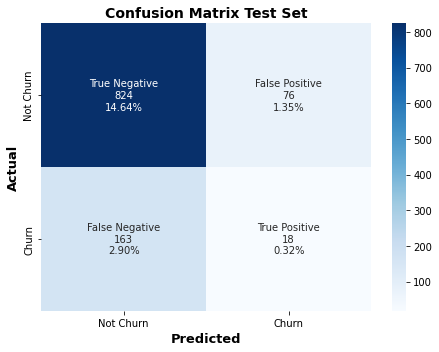

In [ ]:
# confusion matrix pada test set | randomforest tanpa tuning
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(6.5, 5))
# calculate confusion matrix
cmbi = confusion_matrix(y_BI, y_pred_SMOTEbi)

# plot confusion matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbi.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbi.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
target_names = ["Not Churn","Churn"]

sns.heatmap(cmbi, annot=labels, xticklabels = target_names, yticklabels = target_names, fmt='', cmap='Blues')
plt.title('Confusion Matrix Test Set', size =14, fontweight = 'bold')
plt.xlabel('Predicted', size =13, fontweight = 'bold')
plt.ylabel('Actual', size =13, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [ ]:
# y_test_pred = rs.predict_proba(X_test)[:,1] > 0.5
# print(classification_report(y_test, y_test_pred, labels=[1,0]))

In [ ]:
# dengan hyperparameter tuning
y_test_predbi = rsbi.predict(X_BI)
print(classification_report(y_BI, y_test_predbi))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       900
           1       0.21      0.09      0.13       181

    accuracy                           0.79      1081
   macro avg       0.52      0.51      0.50      1081
weighted avg       0.73      0.79      0.75      1081



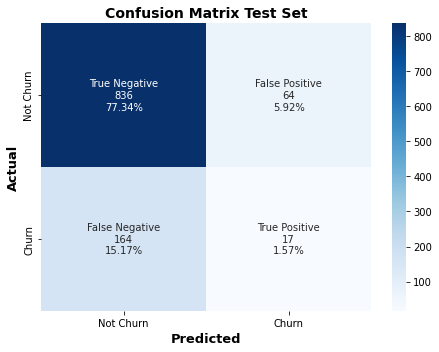

In [ ]:
# confusion matrix pada test set | randomforest dengan tuning
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(6.5, 5))
# calculate confusion matrix
cmbi = confusion_matrix(y_BI, y_test_predbi)

# plot confusion matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbi.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbi.flatten()/np.sum(cmbi)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
target_names = ["Not Churn","Churn"]

sns.heatmap(cmbi, annot=labels, xticklabels = target_names, yticklabels = target_names, fmt='', cmap='Blues')
plt.title('Confusion Matrix Test Set', size =14, fontweight = 'bold')
plt.xlabel('Predicted', size =13, fontweight = 'bold')
plt.ylabel('Actual', size =13, fontweight = 'bold')
plt.tight_layout()
plt.show()